In [1]:
# Installation et chargement de minerva pour MIC
install_load_package <- function(package_name) {
    if (!require(package_name, character.only = TRUE)) {
        install.packages(package_name)
        library(package_name, character.only = TRUE)
    }
}

install_load_package("minerva")
install_load_package("dplyr")
library(minerva)
library(dplyr)

Le chargement a nécessité le package : minerva

Warning message:
"le package 'minerva' a été compilé avec la version R 4.4.2"
Le chargement a nécessité le package : dplyr


Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# Lecture des données
X.reg = read.table("a24_reg_app.txt")

# Structure basique
print("1. Structure des données :")
print(dim(X.reg))  # dimensions
print(str(X.reg))  # structure détaillée
print(summary(X.reg))  # résumé statistique

# Vérification des NA
print("\n2. Valeurs manquantes :")
print(colSums(is.na(X.reg)))

# Distribution de y
print("\n3. Distribution de y :")
print(summary(X.reg$y))
print(sd(X.reg$y))

# Configuration des plots
pdf("all_relationships.pdf", width=15, height=15)  # Pour sauvegarder tous les plots
par(mfrow=c(5,5))  # 5x5 plots par page

# Test de différentes relations non-linéaires et visualisation
results <- data.frame(
    variable = character(),
    linear_cor = numeric(),
    spearman_cor = numeric(),  # Pour les relations monotones non-linéaires
    mic_score = numeric(),     # Pour les relations non-linéaires générales
    stringsAsFactors = FALSE
)

for(i in 1:100) {
    var_name <- paste0("X", i)
    x <- X.reg[,i]
    
    # Plot de base
    plot(x, X.reg$y,
         main=paste("y vs", var_name),
         xlab=var_name, ylab="y",
         pch=16, col=rgb(0,0,0,0.3))
    
    # Ajout LOESS
    loess_fit <- loess(y ~ x, data=X.reg, span=0.75)
    x_order <- order(x)
    lines(x[x_order], predict(loess_fit)[x_order], 
          col="red", lwd=2)
    
    # Ajout régression linéaire
    abline(lm(X.reg$y ~ x), 
           col="blue", lwd=2, lty=2)
    
    # Calcul des différentes corrélations
    results <- rbind(results, data.frame(
        variable = var_name,
        linear_cor = cor(x, X.reg$y),
        spearman_cor = cor(x, X.reg$y, method="spearman"),
        mic_score = mine(x, X.reg$y)$MIC,
        stringsAsFactors = FALSE
    ))
}

dev.off()  # Ferme le PDF

# Trier et afficher les résultats les plus intéressants
results <- results %>%
    mutate(
        linear_cor_abs = abs(linear_cor),
        spearman_cor_abs = abs(spearman_cor),
        nonlinear_strength = mic_score - abs(linear_cor)  # Force de la non-linéarité
    ) %>%
    arrange(desc(nonlinear_strength))

# Afficher les top 10 relations non-linéaires
print("Top 10 relations potentiellement non-linéaires :")
print(head(results[order(-results$nonlinear_strength),], 10))

# Afficher les variables avec forte différence entre Spearman et Pearson
results$cor_difference <- abs(results$spearman_cor) - abs(results$linear_cor)
print("\nTop 10 variables avec différence Spearman-Pearson :")
print(head(results[order(-abs(results$cor_difference)),], 10))

[1] "1. Structure des données :"
[1] 500 101
'data.frame':	500 obs. of  101 variables:
 $ X1  : num  4.49 7.35 7.87 3.88 9.41 ...
 $ X2  : num  5.86 3.99 9.48 5.73 8.69 ...
 $ X3  : num  4.5571 0.0278 5.0577 5.695 9.5843 ...
 $ X4  : num  4.86 7.64 6.37 8.88 3.35 ...
 $ X5  : num  8.25 2.58 1.26 3.33 0.28 ...
 $ X6  : num  8.383 8.686 0.809 8.064 8.981 ...
 $ X7  : num  8.67 6.16 7.6 6.42 4.55 ...
 $ X8  : num  2.048 5.449 0.483 2.446 4.887 ...
 $ X9  : num  6.87 5.79 5 7.18 1.48 ...
 $ X10 : num  9.53 4.67 6.07 4.77 8.25 ...
 $ X11 : num  7.18 2.12 1.3 1.64 1.46 ...
 $ X12 : num  6.16 3.35 8.94 5.79 8.08 ...
 $ X13 : num  9.88 6.72 1.69 8.13 5.42 ...
 $ X14 : num  6.88 4.276 0.947 5.15 0.735 ...
 $ X15 : num  6.436 4.818 0.171 1.671 6.502 ...
 $ X16 : num  8.564 0.353 4.448 0.669 8.277 ...
 $ X17 : num  4.244 7.322 6.289 0.343 3.286 ...
 $ X18 : num  7.21 7.15 8.71 0.49 0.42 ...
 $ X19 : num  7.5 8.63 3.7 4.44 7.02 ...
 $ X20 : num  7.56 5.47 2.5 8.79 7.22 ...
 $ X21 : num  6.854 1.78

png 
  2

[1] "Top 10 relations potentiellement non-linéaires :"
   variable    linear_cor spearman_cor mic_score linear_cor_abs
1       X73 -0.0036485324 -0.008276961 0.1918374   0.0036485324
2       X70  0.0006720102  0.002185545 0.1875323   0.0006720102
3       X37  0.0045827177  0.015975904 0.1771447   0.0045827177
4       X49 -0.0041086537 -0.010046056 0.1731530   0.0041086537
5       X60 -0.0042606516 -0.008046176 0.1698833   0.0042606516
6       X83 -0.0138155633 -0.018235465 0.1785626   0.0138155633
7        X9  0.0064701773  0.029474326 0.1689844   0.0064701773
8       X24  0.0124839190  0.018070536 0.1736835   0.0124839190
9       X95 -0.0032902188  0.019910000 0.1622909   0.0032902188
10      X40 -0.0057722410 -0.007873855 0.1572823   0.0057722410
   spearman_cor_abs nonlinear_strength
1       0.008276961          0.1881889
2       0.002185545          0.1868603
3       0.015975904          0.1725620
4       0.010046056          0.1690443
5       0.008046176          0.1656226
6      

In [3]:
# Calculer la matrice de corrélation entre variables
cor_matrix <- cor(X.reg[, 1:100])

# Visualiser la matrice de corrélation
library(corrplot)
pdf("correlation_matrix.pdf", width=15, height=15)
corrplot(cor_matrix, method="color", type="upper", 
         tl.col="black", tl.srt=45, 
         addCoef.col = "black",
         number.cex = 0.7)
dev.off()

# Trouver les paires de variables fortement corrélées (|r| > 0.7)
high_cors <- which(abs(cor_matrix) > 0.7 & abs(cor_matrix) < 1, arr.ind = TRUE)
high_cors_df <- data.frame(
    var1 = rownames(cor_matrix)[high_cors[,1]],
    var2 = colnames(cor_matrix)[high_cors[,2]],
    correlation = cor_matrix[high_cors]
)
high_cors_df <- high_cors_df[order(-abs(high_cors_df$correlation)),]

# Corrélations avec la variable cible
target_cors <- data.frame(
    variable = names(X.reg)[1:100],
    pearson_cor = sapply(X.reg[,1:100], cor, y=X.reg$y),
    spearman_cor = sapply(X.reg[,1:100], cor, y=X.reg$y, method="spearman")
)
target_cors <- target_cors %>%
    mutate(
        abs_pearson = abs(pearson_cor),
        abs_spearman = abs(spearman_cor)
    ) %>%
    arrange(desc(abs_pearson))

# Afficher les résultats
print("Variables fortement corrélées entre elles (|r| > 0.7):")
print(head(high_cors_df, 10))

print("\nTop 10 variables les plus corrélées avec y (Pearson):")
print(head(target_cors, 10))

# Créer des visualisations pour les variables les plus corrélées avec y
top_vars <- head(target_cors$variable, 6)
pdf("top_correlations.pdf", width=12, height=8)
par(mfrow=c(2,3))
for(var in top_vars) {
    plot(X.reg[[var]], X.reg$y,
         main=paste("y vs", var),
         xlab=var, ylab="y",
         pch=16, col=rgb(0,0,0,0.3))
    abline(lm(y ~ X.reg[[var]], data=X.reg),
           col="red", lwd=2)
    lines(lowess(X.reg[[var]], X.reg$y),
          col="blue", lwd=2, lty=2)
}
dev.off()

# Résumé des statistiques de corrélation
summary_stats <- data.frame(
    metric = c("Mean absolute correlation",
              "Median absolute correlation",
              "Max absolute correlation",
              "Min absolute correlation",
              "Std dev of correlations"),
    pearson = c(mean(abs(target_cors$pearson_cor)),
                median(abs(target_cors$pearson_cor)),
                max(abs(target_cors$pearson_cor)),
                min(abs(target_cors$pearson_cor)),
                sd(target_cors$pearson_cor)),
    spearman = c(mean(abs(target_cors$spearman_cor)),
                 median(abs(target_cors$spearman_cor)),
                 max(abs(target_cors$spearman_cor)),
                 min(abs(target_cors$spearman_cor)),
                 sd(target_cors$spearman_cor))
)

print("\nRésumé des statistiques de corrélation:")
print(summary_stats)


corrplot 0.95 loaded



png 
  2

[1] "Variables fortement corrélées entre elles (|r| > 0.7):"
[1] var1        var2        correlation
<0 lignes> (ou 'row.names' de longueur nulle)
[1] "\nTop 10 variables les plus corrélées avec y (Pearson):"
    variable pearson_cor spearman_cor abs_pearson abs_spearman
X92      X92   0.3775479    0.3652928   0.3775479    0.3652928
X43      X43   0.3232837    0.3230231   0.3232837    0.3230231
X57      X57  -0.2718024   -0.2617451   0.2718024    0.2617451
X8        X8   0.2676847    0.2717730   0.2676847    0.2717730
X76      X76  -0.2495047   -0.2459881   0.2495047    0.2459881
X44      X44  -0.2283222   -0.2406929   0.2283222    0.2406929
X81      X81  -0.2148017   -0.2068499   0.2148017    0.2068499
X29      X29   0.2060082    0.1970644   0.2060082    0.1970644
X46      X46  -0.1957796   -0.1916278   0.1957796    0.1916278
X21      X21   0.1897579    0.1726961   0.1897579    0.1726961


png 
  2

[1] "\nRésumé des statistiques de corrélation:"
                       metric      pearson     spearman
1   Mean absolute correlation 0.0749465049 0.0731545832
2 Median absolute correlation 0.0489669478 0.0445764823
3    Max absolute correlation 0.3775478982 0.3652927892
4    Min absolute correlation 0.0006720102 0.0008565154
5     Std dev of correlations 0.1070581786 0.1047849363


In [22]:
install_load_package("caret")
install_load_package("glmnet")
install_load_package("randomForest")
library(caret)
library(glmnet)
library(randomForest)

In [31]:
calculate_mse <- function(actual, predicted, debug=FALSE, model_name="") {
    mse <- mean((actual - predicted)^2)
    
    if(debug) {
        # Configuration de la mise en page du plot
        par(mfrow=c(1,2))
        
        # Histogrammes avec titre simple
        hist(actual, 
             main=model_name,
             xlab="Values",
             col="lightblue",
             border="white")
        title(sub="Actual y", line=4)
        
        hist(predicted, 
             main="",
             xlab="Values",
             col="lightgreen",
             border="white")
        title(sub="Predicted y", line=4)
        
        # Reset plot layout
        par(mfrow=c(1,1))
        
        # Imprimer les stats après le plot
        actual_range <- range(actual)
        pred_range <- range(predicted)
        cat(sprintf("\n%s:", model_name))
        cat(sprintf("\nMSE: %.2f", mse))
        cat(sprintf("\nActual range: [%.2f, %.2f]", actual_range[1], actual_range[2]))
        cat(sprintf("\nPred range: [%.2f, %.2f]\n", pred_range[1], pred_range[2]))
    }
    
    return(mse)
}
# Fonction pour appliquer PCA
apply_pca <- function(X_train, X_test, var_threshold=0.95) {
    pca_result <- prcomp(X_train, scale=FALSE)
    var_explained <- cumsum(pca_result$sdev^2)/sum(pca_result$sdev^2)
    n_components <- which(var_explained >= var_threshold)[1]
    
    X_train_pca <- predict(pca_result, X_train)[,1:n_components]
    X_test_pca <- predict(pca_result, X_test)[,1:n_components]
    
    list(X_train=X_train_pca, X_test=X_test_pca, n_comp=n_components)
}

# Fonction d'évaluation pour modèles type lm (data.frame)
evaluate_lm <- function(X, y, k=5, do_scale=FALSE, do_pca=FALSE) {
    set.seed(42)
    folds <- createFolds(y, k=k, list=TRUE)
    mse_scores <- numeric(k)
    
    for(i in 1:k) {
        # Split data
        test_indices <- folds[[i]]
        X_train <- X[-test_indices, ]
        y_train <- y[-test_indices]
        X_test <- X[test_indices, ]
        y_test <- y[test_indices]
        
        # Prétraitement
        if(do_scale) {
            scale_params <- list(
                center = colMeans(X_train),
                scale = apply(X_train, 2, sd)
            )
            X_train <- scale(X_train, center=scale_params$center, scale=scale_params$scale)
            X_test <- scale(X_test, center=scale_params$center, scale=scale_params$scale)
            
            y_center <- mean(y_train)
            y_scale <- sd(y_train)
            y_train <- scale(y_train)
        }
        
        if(do_pca) {
            pca_result <- apply_pca(X_train, X_test)
            X_train <- pca_result$X_train
            X_test <- pca_result$X_test
            cat("Fold", i, ":", pca_result$n_comp, "composantes PCA\n")
        }
        
        # Convertir en data.frame pour lm
        train_df <- data.frame(X_train, y=y_train)
        test_df <- data.frame(X_test)
        
        # Entraîner et prédire
        model <- lm(y ~ ., data=train_df)
        predictions <- predict(model, test_df)
        
        if(do_scale) {
            predictions <- predictions * y_scale + y_center
        }
        
        mse_scores[i] <- calculate_mse(y_test, predictions,
                                     model_name=paste0("Fold ", i, " - LM",
                                                     ifelse(do_scale, " scaled", ""),
                                                     ifelse(do_pca, " PCA", "")))
    }
    
    list(mean_mse = mean(mse_scores),
         sd_mse = sd(mse_scores),
         all_scores = mse_scores)
}

# Fonction d'évaluation pour modèles type glmnet (matrix)
evaluate_glmnet <- function(X, y, alpha, k=5, do_scale=FALSE, do_pca=FALSE, model_prefix="glmnet") {
    set.seed(42)
    folds <- createFolds(y, k=k, list=TRUE)
    mse_scores <- numeric(k)
    
    for(i in 1:k) {
        test_indices <- folds[[i]]
        X_train <- X[-test_indices, ]
        y_train <- y[-test_indices]
        X_test <- X[test_indices, ]
        y_test <- y[test_indices]
        
        if(do_scale) {
            scale_params <- list(
                center = colMeans(X_train),
                scale = apply(X_train, 2, sd)
            )
            X_train <- scale(X_train, center=scale_params$center, scale=scale_params$scale)
            X_test <- scale(X_test, center=scale_params$center, scale=scale_params$scale)
            
            y_center <- mean(y_train)
            y_scale <- sd(y_train)
            y_train <- scale(y_train)
        }
        
        if(do_pca) {
            pca_result <- apply_pca(X_train, X_test)
            X_train <- pca_result$X_train
            X_test <- pca_result$X_test
            cat("Fold", i, ":", pca_result$n_comp, "composantes PCA\n")
        }
        
        # S'assurer que X est une matrice
        X_train <- as.matrix(X_train)
        X_test <- as.matrix(X_test)
        
        model <- cv.glmnet(X_train, y_train, alpha=alpha)
        predictions <- predict(model, X_test, s="lambda.min")
        
        if(do_scale) {
            predictions <- predictions * y_scale + y_center
        }
        
        mse_scores[i] <- calculate_mse(y_test, predictions,
                                     model_name=paste0("Fold ", i, " - ", model_prefix,
                                                     ifelse(do_scale, " scaled", ""),
                                                     ifelse(do_pca, " PCA", "")))
    }
    
    list(mean_mse = mean(mse_scores),
         sd_mse = sd(mse_scores),
         all_scores = mse_scores)
}

# Fonction d'évaluation pour RandomForest
evaluate_rf <- function(X, y, k=5, do_scale=FALSE, do_pca=FALSE) {
    set.seed(42)
    folds <- createFolds(y, k=k, list=TRUE)
    mse_scores <- numeric(k)
    
    for(i in 1:k) {
        test_indices <- folds[[i]]
        X_train <- X[-test_indices, ]
        y_train <- y[-test_indices]
        X_test <- X[test_indices, ]
        y_test <- y[test_indices]
        
        if(do_scale) {
            scale_params <- list(
                center = colMeans(X_train),
                scale = apply(X_train, 2, sd)
            )
            X_train <- scale(X_train, center=scale_params$center, scale=scale_params$scale)
            X_test <- scale(X_test, center=scale_params$center, scale=scale_params$scale)
            
            y_center <- mean(y_train)
            y_scale <- sd(y_train)
            y_train <- scale(y_train)
        }
        
        if(do_pca) {
            pca_result <- apply_pca(X_train, X_test)
            X_train <- pca_result$X_train
            X_test <- pca_result$X_test
            cat("Fold", i, ":", pca_result$n_comp, "composantes PCA\n")
        }
        
        model <- randomForest(X_train, y_train)
        predictions <- predict(model, X_test)
        
        if(do_scale) {
            predictions <- predictions * y_scale + y_center
        }
        
        mse_scores[i] <- calculate_mse(y_test, predictions,
                                     model_name=paste0("Fold ", i, " - RF",
                                                     ifelse(do_scale, " scaled", ""),
                                                     ifelse(do_pca, " PCA", "")))
    }
    
    list(mean_mse = mean(mse_scores),
         sd_mse = sd(mse_scores),
         all_scores = mse_scores)
}

# Charger et préparer les données
X <- X.reg[, -ncol(X.reg)]
y <- X.reg$y

# Tester les configurations
configs <- expand.grid(
    scaling = c(FALSE, TRUE),
    pca = c(FALSE, TRUE)
)

results <- list()

# Test Linear Regression
for(i in 1:nrow(configs)) {
    name <- paste("lm", 
                 ifelse(configs$scaling[i], "scaled", "base"),
                 ifelse(configs$pca[i], "pca", "raw"), 
                 sep="_")
    cat("\nTesting", name, "\n")
    results[[name]] <- evaluate_lm(X, y, do_scale=configs$scaling[i], do_pca=configs$pca[i])
}

# Test Ridge
for(i in 1:nrow(configs)) {
    name <- paste("ridge", 
                 ifelse(configs$scaling[i], "scaled", "base"),
                 ifelse(configs$pca[i], "pca", "raw"), 
                 sep="_")
    cat("\nTesting", name, "\n")
    results[[name]] <- evaluate_glmnet(X, y, alpha=0, do_scale=configs$scaling[i], 
                                     do_pca=configs$pca[i], model_prefix="Ridge")
}

# Test Lasso
for(i in 1:nrow(configs)) {
    name <- paste("lasso", 
                 ifelse(configs$scaling[i], "scaled", "base"),
                 ifelse(configs$pca[i], "pca", "raw"), 
                 sep="_")
    cat("\nTesting", name, "\n")
    results[[name]] <- evaluate_glmnet(X, y, alpha=1, do_scale=configs$scaling[i], 
                                     do_pca=configs$pca[i], model_prefix="Lasso")
}

# Test Random Forest
for(i in 1:nrow(configs)) {
    name <- paste("rf", 
                 ifelse(configs$scaling[i], "scaled", "base"),
                 ifelse(configs$pca[i], "pca", "raw"), 
                 sep="_")
    cat("\nTesting", name, "\n")
    results[[name]] <- evaluate_rf(X, y, do_scale=configs$scaling[i], do_pca=configs$pca[i])
}

# Créer tableau de résultats
results_df <- data.frame(
    Model = names(results),
    Mean_MSE = sapply(results, function(x) round(x$mean_mse, 2)),
    SD_MSE = sapply(results, function(x) round(x$sd_mse, 2))
)
rownames(results_df) <- NULL

# Afficher résultats triés par MSE
print("\nRésultats de toutes les configurations:")
print(results_df[order(results_df$Mean_MSE),])


Testing lm_base_raw 

Testing lm_scaled_raw 

Testing lm_base_pca 
Fold 1 : 87 composantes PCA
Fold 2 : 87 composantes PCA
Fold 3 : 87 composantes PCA
Fold 4 : 86 composantes PCA
Fold 5 : 87 composantes PCA

Testing lm_scaled_pca 
Fold 1 : 87 composantes PCA
Fold 2 : 87 composantes PCA
Fold 3 : 87 composantes PCA
Fold 4 : 87 composantes PCA
Fold 5 : 87 composantes PCA

Testing ridge_base_raw 

Testing ridge_scaled_raw 

Testing ridge_base_pca 
Fold 1 : 87 composantes PCA
Fold 2 : 87 composantes PCA
Fold 3 : 87 composantes PCA
Fold 4 : 86 composantes PCA
Fold 5 : 87 composantes PCA

Testing ridge_scaled_pca 
Fold 1 : 87 composantes PCA
Fold 2 : 87 composantes PCA
Fold 3 : 87 composantes PCA
Fold 4 : 87 composantes PCA
Fold 5 : 87 composantes PCA

Testing lasso_base_raw 

Testing lasso_scaled_raw 

Testing lasso_base_pca 
Fold 1 : 87 composantes PCA
Fold 2 : 87 composantes PCA
Fold 3 : 87 composantes PCA
Fold 4 : 86 composantes PCA
Fold 5 : 87 composantes PCA

Testing lasso_scaled_pca 


Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place."
Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place."
Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place."
Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place."
Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la pla


Testing rf_base_pca 
Fold 1 : 87 composantes PCA
Fold 2 : 87 composantes PCA
Fold 3 : 87 composantes PCA
Fold 4 : 86 composantes PCA
Fold 5 : 87 composantes PCA

Testing rf_scaled_pca 
Fold 1 : 87 composantes PCA


Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place."


Fold 2 : 87 composantes PCA


Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place."


Fold 3 : 87 composantes PCA


Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place."


Fold 4 : 87 composantes PCA


Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place."


Fold 5 : 87 composantes PCA


Warning message in rfout$mse/(var(y) * (n - 1)/n):
"Le recyclage d’un tableau (array) de longueur 1 dans un calcul arithmétique vecteur-tableau est obsolète.
  Utilisez c() ou as.vector() à la place."


[1] "\nRésultats de toutes les configurations:"
              Model Mean_MSE SD_MSE
9    lasso_base_raw   133.64  15.82
10 lasso_scaled_raw   133.64  15.82
1       lm_base_raw   143.33  18.11
2     lm_scaled_raw   143.33  18.11
5    ridge_base_raw   149.01  11.72
6  ridge_scaled_raw   149.01  11.72
3       lm_base_pca   629.42 101.94
11   lasso_base_pca   631.06 102.93
7    ridge_base_pca   632.12 104.68
4     lm_scaled_pca   650.26 111.76
12 lasso_scaled_pca   652.86 111.55
8  ridge_scaled_pca   653.18 111.30
14    rf_scaled_raw  2098.46 192.79
13      rf_base_raw  2110.07 202.30
15      rf_base_pca  2400.21 187.85
16    rf_scaled_pca  2488.77 181.48


In [33]:
# Reusing the calculate_mse function from before
calculate_mse <- function(actual, predicted, debug=FALSE, model_name="") {
    mse <- mean((actual - predicted)^2)
    
    if(debug) {
        par(mfrow=c(1,2))
        
        hist(actual, 
             main=model_name,
             xlab="Values",
             col="lightblue",
             border="white")
        title(sub="Actual y", line=4)
        
        hist(predicted, 
             main="",
             xlab="Values",
             col="lightgreen",
             border="white")
        title(sub="Predicted y", line=4)
        
        par(mfrow=c(1,1))
        
        actual_range <- range(actual)
        pred_range <- range(predicted)
        cat(sprintf("\n%s:", model_name))
        cat(sprintf("\nMSE: %.2f", mse))
        cat(sprintf("\nActual range: [%.2f, %.2f]", actual_range[1], actual_range[2]))
        cat(sprintf("\nPred range: [%.2f, %.2f]\n", pred_range[1], pred_range[2]))
    }
    
    return(mse)
}

# Enhanced evaluation function for glmnet models with parameter tuning
evaluate_glmnet_tuned <- function(X, y, alpha_range, k=5, do_scale=TRUE, model_prefix="") {
    set.seed(42)
    folds <- createFolds(y, k=k, list=TRUE)
    results <- data.frame()
    
    for(alpha in alpha_range) {
        mse_scores <- numeric(k)
        
        for(i in 1:k) {
            test_indices <- folds[[i]]
            X_train <- X[-test_indices, ]
            y_train <- y[-test_indices]
            X_test <- X[test_indices, ]
            y_test <- y[test_indices]
            
            if(do_scale) {
                scale_params <- list(
                    center = colMeans(X_train),
                    scale = apply(X_train, 2, sd)
                )
                X_train <- scale(X_train, center=scale_params$center, scale=scale_params$scale)
                X_test <- scale(X_test, center=scale_params$center, scale=scale_params$scale)
                
                y_center <- mean(y_train)
                y_scale <- sd(y_train)
                y_train <- scale(y_train)
            }
            
            X_train <- as.matrix(X_train)
            X_test <- as.matrix(X_test)
            
            # Use cross-validation to find optimal lambda for this alpha
            model <- cv.glmnet(X_train, y_train, alpha=alpha)
            predictions <- predict(model, X_test, s="lambda.min")
            
            if(do_scale) {
                predictions <- predictions * y_scale + y_center
            }
            
            model_name <- sprintf("Fold %d - %s (α=%.2f)", 
                                i, model_prefix, alpha)
            
            mse_scores[i] <- calculate_mse(y_test, predictions,
                                        #  debug=(i==1), # Only show debug plots for first fold
                                         model_name=model_name)
            
            # Store detailed results
            results <- rbind(results, data.frame(
                alpha = alpha,
                fold = i,
                mse = mse_scores[i],
                lambda = model$lambda.min,
                n_features = sum(coef(model, s="lambda.min") != 0) - 1
            ))
        }
        
        # Print progress
        mean_mse <- mean(mse_scores)
        sd_mse <- sd(mse_scores)
        cat(sprintf("\nα=%.2f: MSE=%.2f (±%.2f)\n", 
                   alpha, mean_mse, sd_mse))
    }
    
    # Summarize results by alpha
    summary_results <- results %>%
        group_by(alpha) %>%
        summarize(
            mean_mse = mean(mse),
            sd_mse = sd(mse),
            mean_features = mean(n_features),
            mean_lambda = mean(lambda)
        ) %>%
        arrange(mean_mse)
    
    return(list(
        summary = summary_results,
        details = results
    ))
}

# Main execution
# Define parameter ranges
lasso_alphas <- seq(0.95, 1, length.out=10)  # Fine-tune around pure Lasso
elastic_net_alphas <- seq(0.1, 0.9, length.out=20)  # Wider range for Elastic Net

# Run evaluations
X <- X.reg[, -ncol(X.reg)]  # Assuming X.reg is your dataset
y <- X.reg$y

# Test Lasso fine-tuning
cat("\nFine-tuning Lasso:\n")
lasso_results <- evaluate_glmnet_tuned(X, y, lasso_alphas, 
                                     model_prefix="Lasso",
                                     do_scale=TRUE)

# Test Elastic Net
cat("\nFine-tuning Elastic Net:\n")
elastic_net_results <- evaluate_glmnet_tuned(X, y, elastic_net_alphas,
                                           model_prefix="Elastic Net",
                                           do_scale=TRUE)

# Combine results for comparison
final_comparison <- rbind(
    cbind(Model="Lasso", lasso_results$summary),
    cbind(Model="Elastic Net", elastic_net_results$summary)
) %>%
    arrange(mean_mse)

# Print final comparison
print("\nFinal Results (sorted by MSE):")
print(final_comparison)

# Get best configurations
best_lasso <- lasso_results$summary[which.min(lasso_results$summary$mean_mse), ]
best_elastic <- elastic_net_results$summary[which.min(elastic_net_results$summary$mean_mse), ]

cat("\nBest Configurations:")
cat("\nBest Lasso: α=", best_lasso$alpha, 
    ", MSE=", round(best_lasso$mean_mse, 2),
    " (±", round(best_lasso$sd_mse, 2), ")",
    ", Features=", round(best_lasso$mean_features, 0))
cat("\nBest Elastic Net: α=", best_elastic$alpha,
    ", MSE=", round(best_elastic$mean_mse, 2),
    " (±", round(best_elastic$sd_mse, 2), ")",
    ", Features=", round(best_elastic$mean_features, 0))


Fine-tuning Lasso:

α=0.95: MSE=133.67 (±15.80)

α=0.96: MSE=133.93 (±16.56)

α=0.96: MSE=133.60 (±16.86)

α=0.97: MSE=133.89 (±16.62)

α=0.97: MSE=133.54 (±16.43)

α=0.98: MSE=133.34 (±15.85)

α=0.98: MSE=132.88 (±15.95)

α=0.99: MSE=133.85 (±17.22)

α=0.99: MSE=133.40 (±16.00)

α=1.00: MSE=133.30 (±16.20)

Fine-tuning Elastic Net:

α=0.10: MSE=138.22 (±14.08)

α=0.14: MSE=137.26 (±14.73)

α=0.18: MSE=136.31 (±15.17)

α=0.23: MSE=136.51 (±15.56)

α=0.27: MSE=135.70 (±15.76)

α=0.31: MSE=134.57 (±14.98)

α=0.35: MSE=134.43 (±15.16)

α=0.39: MSE=134.70 (±16.15)

α=0.44: MSE=134.28 (±15.32)

α=0.48: MSE=134.39 (±15.85)

α=0.52: MSE=134.13 (±16.04)

α=0.56: MSE=133.24 (±15.61)

α=0.61: MSE=133.95 (±15.84)

α=0.65: MSE=133.67 (±16.23)

α=0.69: MSE=134.98 (±16.20)

α=0.73: MSE=133.07 (±15.85)

α=0.77: MSE=133.74 (±16.31)

α=0.82: MSE=133.76 (±16.80)

α=0.86: MSE=133.48 (±16.50)

α=0.90: MSE=134.62 (±16.57)
[1] "\nFinal Results (sorted by MSE):"
         Model     alpha mean_mse   sd_mse me

In [ ]:
# More precise grid search around best performing parameters
# Since best Lasso (α=0.983, MSE=132.88) performed slightly better than Elastic Net,
# we'll focus on that region but also explore nearby values

# Function for very fine-tuned grid search
evaluate_fine_tuned_glmnet <- function(X, y, 
                                     alpha_min=0.97, 
                                     alpha_max=0.99, 
                                     n_alphas=30,
                                     lambda_eps=1e-4,
                                     k=5, 
                                     do_scale=TRUE) {
    set.seed(42)
    folds <- createFolds(y, k=k, list=TRUE)
    
    # Create very fine alpha grid around best region
    alpha_grid <- seq(alpha_min, alpha_max, length.out=n_alphas)
    results <- data.frame()
    
    for(alpha in alpha_grid) {
        mse_scores <- numeric(k)
        
        for(i in 1:k) {
            test_indices <- folds[[i]]
            X_train <- X[-test_indices, ]
            y_train <- y[-test_indices]
            X_test <- X[test_indices, ]
            y_test <- y[test_indices]
            
            if(do_scale) {
                scale_params <- list(
                    center = colMeans(X_train),
                    scale = apply(X_train, 2, sd)
                )
                X_train <- scale(X_train, center=scale_params$center, scale=scale_params$scale)
                X_test <- scale(X_test, center=scale_params$center, scale=scale_params$scale)
                
                y_center <- mean(y_train)
                y_scale <- sd(y_train)
                y_train <- scale(y_train)
            }
            
            X_train <- as.matrix(X_train)
            X_test <- as.matrix(X_test)
            
            # Use more lambda values and tighter epsilon for finer search
            model <- cv.glmnet(X_train, y_train, 
                             alpha=alpha,
                             nlambda=200,  # More lambda values
                             eps=lambda_eps)  # Smaller epsilon for finer lambda sequence
            
            predictions <- predict(model, X_test, s="lambda.min")
            
            if(do_scale) {
                predictions <- predictions * y_scale + y_center
            }
            
            model_name <- sprintf("Fold %d - Fine Tuned (α=%.4f)", i, alpha)
            mse_scores[i] <- calculate_mse(y_test, predictions,
                                        #  debug=(i==1), # Only show plots for first fold
                                         model_name=model_name)
            
            # Store detailed results
            results <- rbind(results, data.frame(
                alpha = alpha,
                fold = i,
                mse = mse_scores[i],
                lambda = model$lambda.min,
                n_features = sum(coef(model, s="lambda.min") != 0) - 1
            ))
        }
        
        # Print progress with more decimal places
        mean_mse <- mean(mse_scores)
        sd_mse <- sd(mse_scores)
        cat(sprintf("\nα=%.4f: MSE=%.4f (±%.4f)\n", 
                   alpha, mean_mse, sd_mse))
    }
    
    # Summarize results by alpha
    summary_results <- results %>%
        group_by(alpha) %>%
        summarize(
            mean_mse = mean(mse),
            sd_mse = sd(mse),
            mean_features = mean(n_features),
            mean_lambda = mean(lambda)
        ) %>%
        arrange(mean_mse)
    
    return(list(
        summary = summary_results,
        details = results
    ))
}

# Run fine-tuned grid search
X <- X.reg[, -ncol(X.reg)]
y <- X.reg$y

# First search around best Lasso region
cat("\nFine grid search around best Lasso region:\n")
fine_results1 <- evaluate_fine_tuned_glmnet(X, y, 
                                          alpha_min=0.97, 
                                          alpha_max=0.99,
                                          n_alphas=30)

# Second even finer search around best result from first fine search
best_alpha1 <- fine_results1$summary$alpha[1]
alpha_range <- 0.005  # Very narrow range
cat("\nUltra-fine grid search around best alpha:\n")
fine_results2 <- evaluate_fine_tuned_glmnet(X, y,
                                          alpha_min=best_alpha1 - alpha_range,
                                          alpha_max=best_alpha1 + alpha_range,
                                          n_alphas=20,
                                          lambda_eps=1e-5)  # Even smaller epsilon

# Print final results
cat("\nBest configurations from fine-tuned searches:\n")
print(head(fine_results1$summary, 5))
cat("\nBest configurations from ultra-fine-tuned search:\n")
print(head(fine_results2$summary, 5))

# Get overall best configuration
all_results <- rbind(fine_results1$summary, fine_results2$summary)
best_config <- all_results[which.min(all_results$mean_mse), ]

cat("\nOverall best configuration:")
cat(sprintf("\nα = %.6f", best_config$alpha))
cat(sprintf("\nMSE = %.4f (±%.4f)", best_config$mean_mse, best_config$sd_mse))
cat(sprintf("\nAverage number of features: %.1f", best_config$mean_features))
cat(sprintf("\nOptimal lambda: %.6f", best_config$mean_lambda))


Fine grid search around best Lasso region:

α=0.9700: MSE=133.7271 (±16.1917)

α=0.9707: MSE=133.7452 (±16.5848)

α=0.9714: MSE=133.8417 (±17.0210)

α=0.9721: MSE=133.9905 (±16.5228)

α=0.9728: MSE=133.8626 (±16.6718)

α=0.9734: MSE=133.6359 (±16.0074)

α=0.9741: MSE=132.9281 (±16.0148)

α=0.9748: MSE=133.8626 (±17.1731)

α=0.9755: MSE=133.6415 (±16.0849)

α=0.9762: MSE=133.3816 (±16.2241)

α=0.9769: MSE=133.4802 (±16.4525)

α=0.9776: MSE=132.7415 (±16.0511)

α=0.9783: MSE=133.9042 (±16.0180)

α=0.9790: MSE=133.2793 (±16.3978)

α=0.9797: MSE=134.8268 (±16.5349)

α=0.9803: MSE=132.9338 (±16.0761)

α=0.9810: MSE=133.3564 (±16.3418)

α=0.9817: MSE=133.4987 (±16.8060)

α=0.9824: MSE=133.3205 (±16.5263)

α=0.9831: MSE=134.8337 (±16.7361)

α=0.9838: MSE=133.5784 (±16.0063)

α=0.9845: MSE=134.6325 (±17.0477)

α=0.9852: MSE=134.1839 (±16.4267)

α=0.9859: MSE=132.7662 (±15.9895)

α=0.9866: MSE=133.9322 (±16.5556)

α=0.9872: MSE=134.3161 (±16.2002)

α=0.9879: MSE=132.6321 (±16.1125)

α=0.9886: 


Analyzing feature stability...

Feature Stability Analysis:
Number of stable features: 64

Top 20 most stable features:   feature selection_prob  mean_coef     sd_coef coef_stability
1      X92              1  0.3609483 0.007419365       48.64949
2      X43              1  0.2828226 0.006984690       40.49179
3       X8              1  0.2656856 0.006739296       39.42334
4      X44              1 -0.2569850 0.007007100       36.67494
5      X29              1  0.2482022 0.006696113       37.06661
6      X57              1 -0.2475025 0.007079007       34.96289
7      X87              1  0.2324311 0.005943751       39.10511
8      X27              1 -0.2200193 0.007339152       29.97884
9      X46              1 -0.2023896 0.006907712       29.29908
10     X71              1  0.1795496 0.005433207       33.04671
11     X33              1  0.1707517 0.005707793       29.91554
12     X21              1  0.1542046 0.006035723       25.54866
13     X62              1 -0.1470801 0.005954309

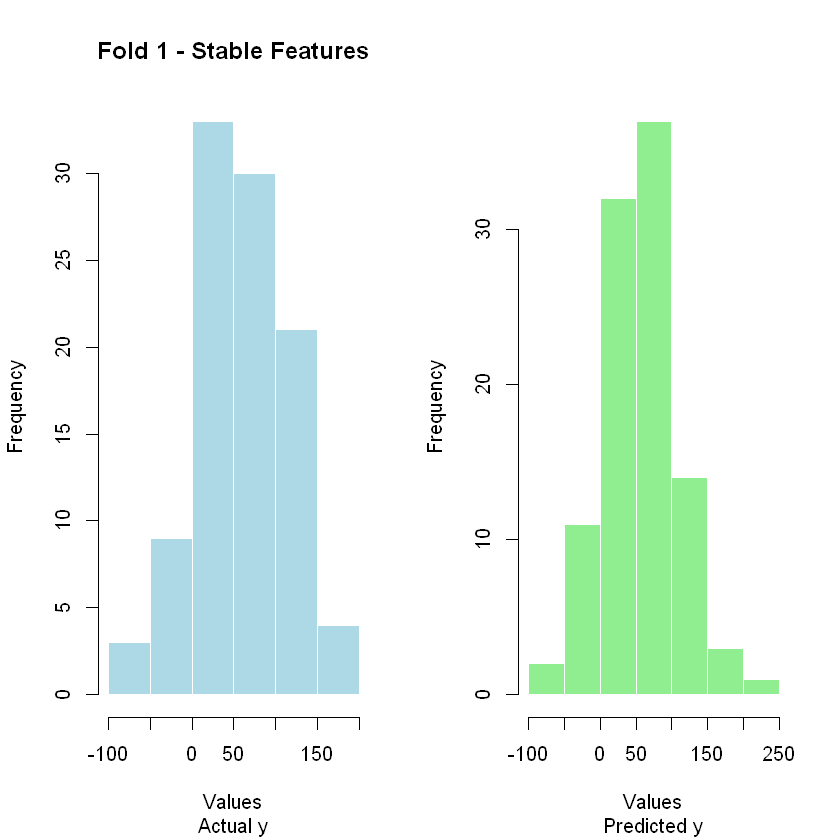

In [ ]:
# Function to analyze feature stability across folds and subsamples
analyze_feature_stability <- function(X, y, 
                                    alpha=0.987931, 
                                    n_subsamples=100,
                                    subsample_size=0.8,
                                    selection_threshold=0.7) {
    set.seed(42)
    n_samples <- nrow(X)
    n_features <- ncol(X)
    feature_counts <- matrix(0, nrow=n_features, ncol=n_subsamples)
    coef_values <- matrix(0, nrow=n_features, ncol=n_subsamples)
    
    for(i in 1:n_subsamples) {
        # Subsample the data
        subsample_idx <- sample(n_samples, size=floor(n_samples * subsample_size))
        X_sub <- scale(X[subsample_idx,])
        y_sub <- scale(y[subsample_idx])
        
        # Fit model on subsample
        model <- cv.glmnet(as.matrix(X_sub), y_sub, alpha=alpha)
        
        # Extract coefficients
        coefs <- coef(model, s="lambda.min")[-1] # Remove intercept
        feature_counts[,i] <- abs(coefs) > 0
        coef_values[,i] <- coefs
    }
    
    # Calculate stability metrics
    selection_probability <- rowMeans(feature_counts)
    mean_coefficient <- rowMeans(coef_values)
    sd_coefficient <- apply(coef_values, 1, sd)
    
    # Create stability summary
    stability_summary <- data.frame(
        feature = colnames(X),
        selection_prob = selection_probability,
        mean_coef = mean_coefficient,
        sd_coef = sd_coefficient,
        coef_stability = abs(mean_coefficient) / (sd_coefficient + 1e-10)
    ) %>%
        arrange(desc(selection_prob), desc(abs(mean_coef)))
    
    # Select stable features
    stable_features <- stability_summary$feature[stability_summary$selection_prob >= selection_threshold]
    
    return(list(
        stability_summary = stability_summary,
        stable_features = stable_features,
        n_stable_features = length(stable_features)
    ))
}

# Function to evaluate model with selected features
evaluate_stable_features <- function(X, y, stability_results, k=5) {
    stable_features <- stability_results$stable_features
    X_selected <- X[, stable_features]
    
    # Evaluate model with only stable features
    folds <- createFolds(y, k=k)
    mse_scores <- numeric(k)
    n_features_selected <- numeric(k)
    
    for(i in 1:k) {
        # Split data
        test_idx <- folds[[i]]
        X_train <- scale(X_selected[-test_idx,])
        y_train <- scale(y[-test_idx])
        X_test <- scale(X_selected[test_idx,], 
                       center=attr(X_train, "scaled:center"),
                       scale=attr(X_train, "scaled:scale"))
        y_test <- y[test_idx]
        
        # Fit model
        model <- cv.glmnet(as.matrix(X_train), y_train, alpha=0.987931)
        
        # Make predictions
        predictions <- predict(model, as.matrix(X_test), s="lambda.min")
        predictions <- predictions * sd(y[-test_idx]) + mean(y[-test_idx])
        
        # Calculate MSE
        mse_scores[i] <- calculate_mse(y_test, predictions,
                                    #  debug=(i==1),
                                     model_name=paste("Fold", i, "- Stable Features"))
        
        # Count selected features
        n_features_selected[i] <- sum(coef(model, s="lambda.min")[-1] != 0)
    }
    
    return(list(
        mean_mse = mean(mse_scores),
        sd_mse = sd(mse_scores),
        mse_scores = mse_scores,
        avg_features_used = mean(n_features_selected)
    ))
}

# Run stability analysis
X <- X.reg[, -ncol(X.reg)]
y <- X.reg$y

# First analyze feature stability
cat("\nAnalyzing feature stability...")
stability_results <- analyze_feature_stability(X, y, 
                                            selection_threshold=0.7)  # Start with 70% threshold

# Print stability results
cat("\n\nFeature Stability Analysis:")
cat(sprintf("\nNumber of stable features: %d", stability_results$n_stable_features))
cat("\n\nTop 20 most stable features:")
print(head(stability_results$stability_summary, 20))

# Evaluate model with stable features
cat("\n\nEvaluating model with stable features...")
stable_eval <- evaluate_stable_features(X, y, stability_results)

cat("\n\nResults with stable features only:")
cat(sprintf("\nMSE: %.4f (±%.4f)", stable_eval$mean_mse, sd(stable_eval$mse_scores)))
cat(sprintf("\nAverage number of features used: %.1f", stable_eval$avg_features_used))

# Compare with previous best
previous_mse <- 132.6321
cat(sprintf("\n\nComparison with previous best (MSE=%.4f):", previous_mse))
cat(sprintf("\nMSE difference: %.4f", stable_eval$mean_mse - previous_mse))

In [37]:
# Function to perform comprehensive stability and parameter tuning
tune_stable_model <- function(X, y, 
                            thresholds = seq(0.6, 0.8, by=0.05),  # Different stability thresholds
                            alphas = seq(0.95, 1, by=0.01),       # Fine alpha grid
                            n_subsamples = 100,
                            k = 5) {
    results_df <- data.frame()
    best_mse <- Inf
    best_config <- NULL
    
    for(threshold in thresholds) {
        cat(sprintf("\nTesting stability threshold: %.2f", threshold))
        
        # Get stable features for this threshold
        stability_results <- analyze_feature_stability(X, y, 
                                                     selection_threshold=threshold,
                                                     n_subsamples=n_subsamples)
        
        n_stable <- length(stability_results$stable_features)
        cat(sprintf("\nNumber of stable features: %d", n_stable))
        
        # Skip if too few features selected
        if(n_stable < 10) {
            cat("\nToo few features, skipping...")
            next
        }
        
        # Get reduced dataset
        X_stable <- X[, stability_results$stable_features]
        
        # Test different alphas with these features
        for(alpha in alphas) {
            cat(sprintf("\nTesting alpha=%.3f", alpha))
            
            # Cross-validation
            folds <- createFolds(y, k=k)
            mse_scores <- numeric(k)
            n_features_used <- numeric(k)
            
            for(i in 1:k) {
                # Split and scale data
                test_idx <- folds[[i]]
                X_train <- scale(X_stable[-test_idx,])
                y_train <- scale(y[-test_idx])
                X_test <- scale(X_stable[test_idx,], 
                              center=attr(X_train, "scaled:center"),
                              scale=attr(X_train, "scaled:scale"))
                y_test <- y[test_idx]
                
                # Fit model with current parameters
                model <- cv.glmnet(as.matrix(X_train), y_train, alpha=alpha)
                
                # Predict and unscale
                predictions <- predict(model, as.matrix(X_test), s="lambda.min")
                predictions <- predictions * sd(y[-test_idx]) + mean(y[-test_idx])
                
                # Calculate MSE
                mse_scores[i] <- calculate_mse(y_test, predictions,
                                            #  debug=(i==1 && alpha==alphas[1]),  # Show plots only first time
                                             model_name=sprintf("Threshold=%.2f, Alpha=%.3f", 
                                                              threshold, alpha))
                
                n_features_used[i] <- sum(coef(model, s="lambda.min")[-1] != 0)
            }
            
            # Store results
            current_result <- data.frame(
                threshold = threshold,
                alpha = alpha,
                n_stable_features = n_stable,
                mean_mse = mean(mse_scores),
                sd_mse = sd(mse_scores),
                avg_features_used = mean(n_features_used)
            )
            
            results_df <- rbind(results_df, current_result)
            
            # Update best if improved
            if(current_result$mean_mse < best_mse) {
                best_mse <- current_result$mean_mse
                best_config <- current_result
                
                cat(sprintf("\nNew best configuration found:"))
                cat(sprintf("\nMSE: %.4f (±%.4f)", best_mse, current_result$sd_mse))
                cat(sprintf("\nThreshold: %.2f, Alpha: %.3f", threshold, alpha))
                cat(sprintf("\nFeatures: %.1f\n", current_result$avg_features_used))
            }
        }
    }
    
    # Sort results
    results_df <- results_df %>% arrange(mean_mse)
    
    return(list(
        all_results = results_df,
        best_config = best_config
    ))
}

# Run comprehensive tuning
X <- X.reg[, -ncol(X.reg)]
y <- X.reg$y

cat("\nStarting comprehensive model tuning...")
tuning_results <- tune_stable_model(X, y)

# Print final summary
cat("\n\nTop 10 configurations:")
print(head(tuning_results$all_results, 10))

cat("\n\nBest configuration found:")
best <- tuning_results$best_config
cat(sprintf("\nStability threshold: %.2f", best$threshold))
cat(sprintf("\nAlpha: %.3f", best$alpha))
cat(sprintf("\nMSE: %.4f (±%.4f)", best$mean_mse, best$sd_mse))
cat(sprintf("\nNumber of stable features: %d", best$n_stable_features))
cat(sprintf("\nAverage features used in model: %.1f", best$avg_features_used))

# Compare with previous results
cat("\n\nComparison with previous results:")
cat(sprintf("\nPrevious stable features MSE: 128.20"))
cat(sprintf("\nImprovement: %.4f", 128.20 - best$mean_mse))


Starting comprehensive model tuning...
Testing stability threshold: 0.60
Number of stable features: 69
Testing alpha=0.950
New best configuration found:
MSE: 130.2307 (±15.7613)
Threshold: 0.60, Alpha: 0.950
Features: 67.4

Testing alpha=0.960
New best configuration found:
MSE: 123.1793 (±12.5395)
Threshold: 0.60, Alpha: 0.960
Features: 68.4

Testing alpha=0.970
Testing alpha=0.980
Testing alpha=0.990
New best configuration found:
MSE: 120.2958 (±12.8237)
Threshold: 0.60, Alpha: 0.990
Features: 68.8

Testing alpha=1.000
Testing stability threshold: 0.65
Number of stable features: 64
Testing alpha=0.950
Testing alpha=0.960
Testing alpha=0.970
Testing alpha=0.980
Testing alpha=0.990
New best configuration found:
MSE: 118.9806 (±13.5651)
Threshold: 0.65, Alpha: 0.990
Features: 63.8

Testing alpha=1.000
Testing stability threshold: 0.70
Number of stable features: 64
Testing alpha=0.950
Testing alpha=0.960
Testing alpha=0.970
Testing alpha=0.980
Testing alpha=0.990
Testing alpha=1.000
Test


Starting super fine tuning...
Testing stability threshold: 0.740
Number of stable features: 61
Testing alpha=0.9850
Super-Fine: T=0.740, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

New best configuration found:
MSE: 123.9094 (±21.2800)
Threshold: 0.740, Alpha: 0.9850
Features: 61.0
Lambda: 0.001269 (±0.000029)

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
New best configuration found:
MSE: 122.8868 (±16.9754)
Threshold: 0.740, Alpha: 0.9920
Features: 60.6
Lambda: 0.001257 (±0.000010)

Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950
New best configuration found:
MSE: 121.9120 (±19.0871)
Threshold: 0.740, Alpha: 0.9950
Features: 61.0
Lambda: 0.001264 (±0.000039)

Testing stability threshold: 0.742
Number of stable features: 61
Testing alpha=0.9850

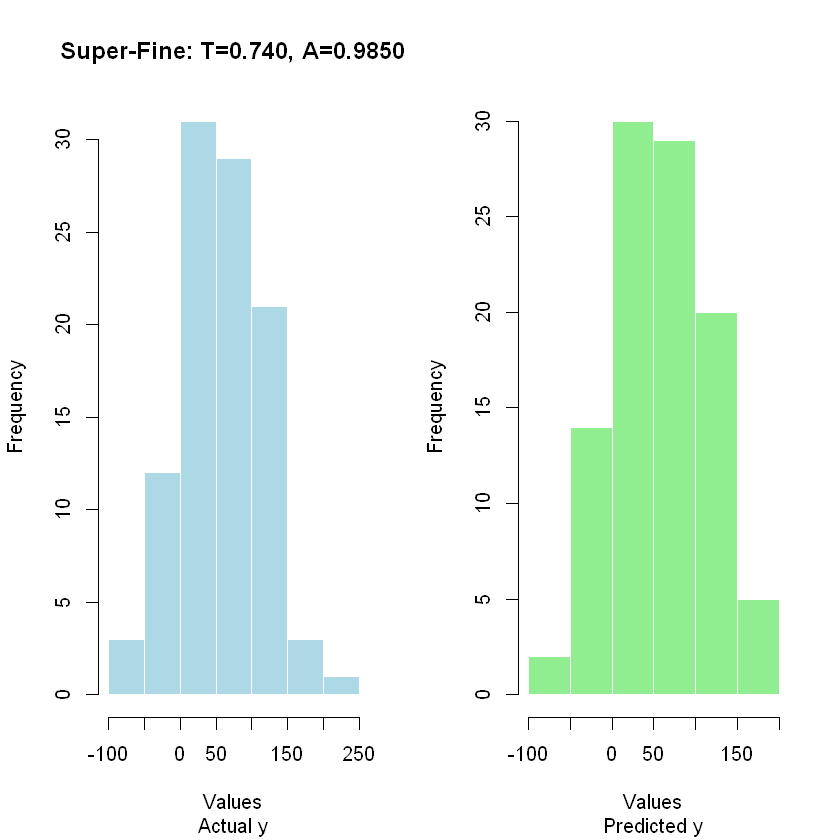


Super-Fine: T=0.742, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950
Testing stability threshold: 0.744
Number of stable features: 61
Testing alpha=0.9850

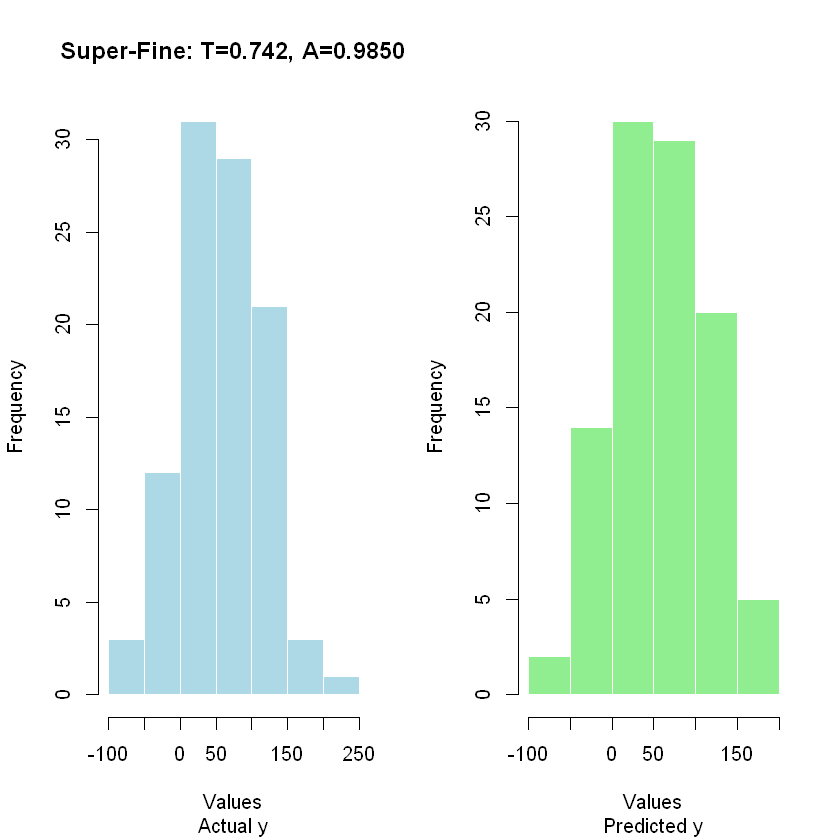


Super-Fine: T=0.744, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950
Testing stability threshold: 0.746
Number of stable features: 61
Testing alpha=0.9850

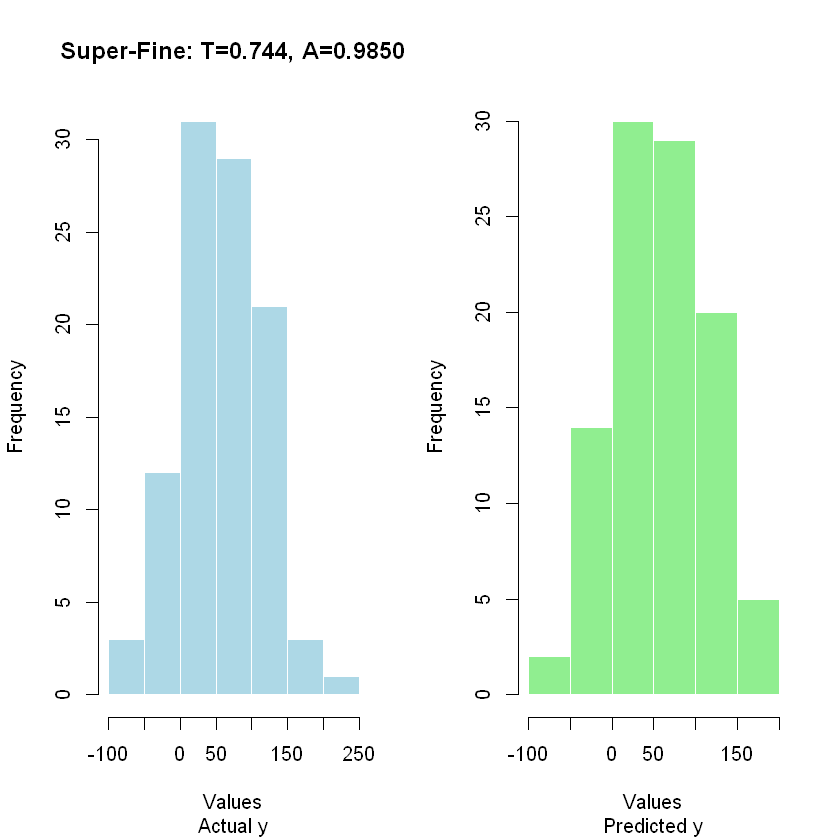


Super-Fine: T=0.746, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950
Testing stability threshold: 0.748
Number of stable features: 61
Testing alpha=0.9850

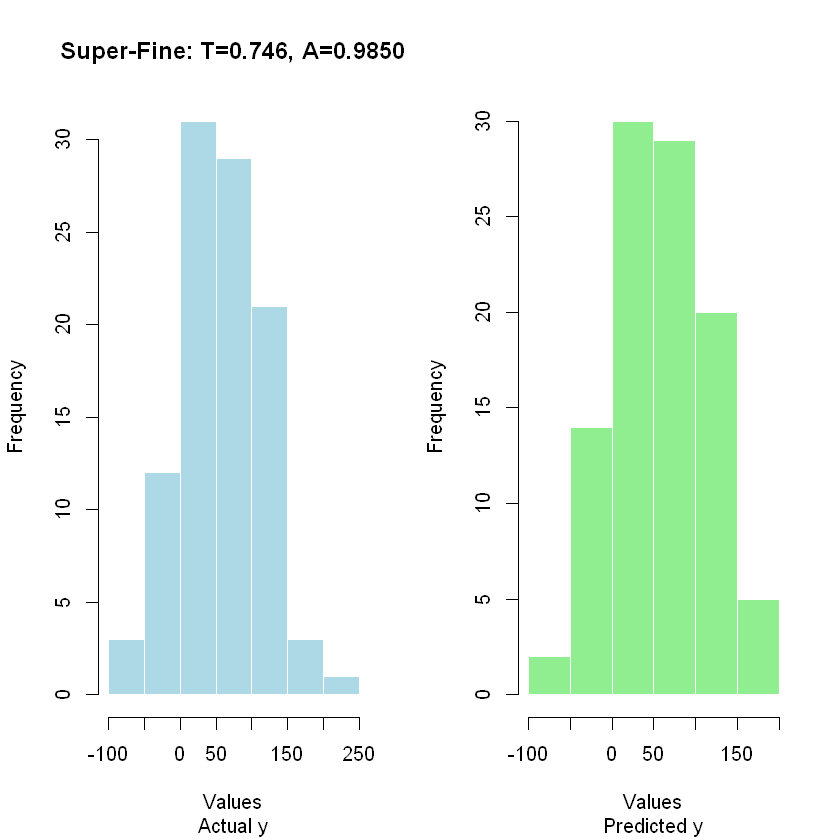


Super-Fine: T=0.748, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950
Testing stability threshold: 0.750
Number of stable features: 61
Testing alpha=0.9850

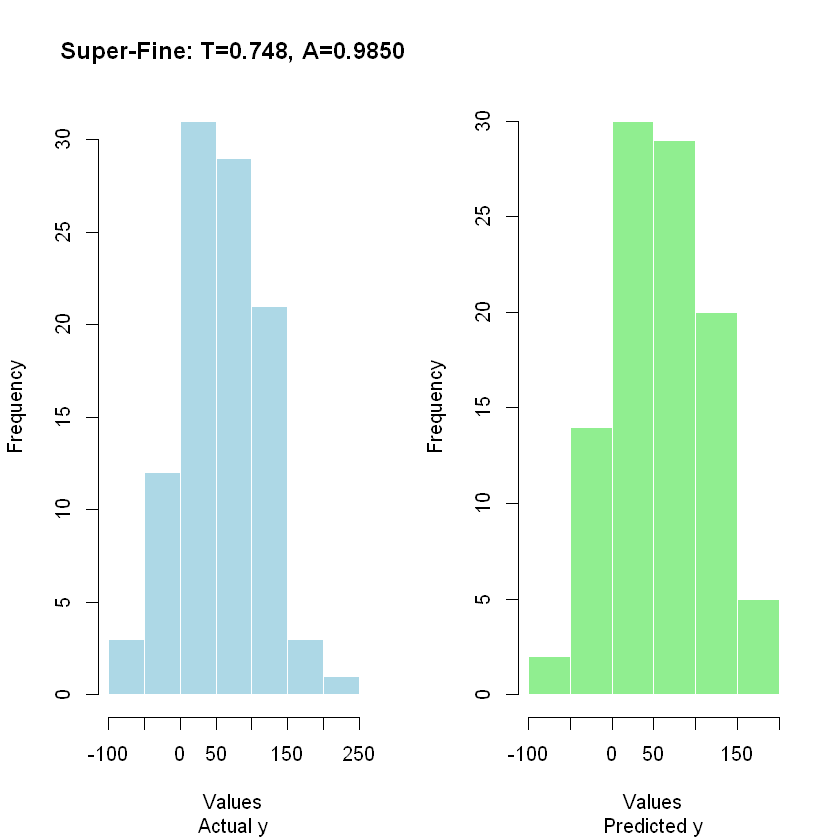


Super-Fine: T=0.750, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950
Testing stability threshold: 0.752
Number of stable features: 61
Testing alpha=0.9850

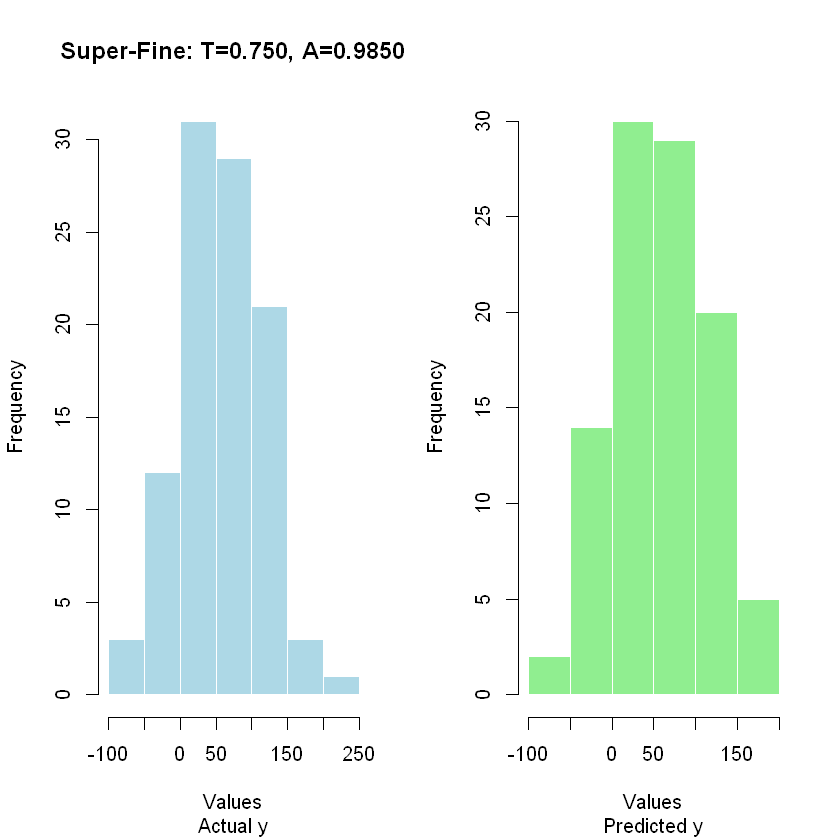


Super-Fine: T=0.752, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950
Testing stability threshold: 0.754
Number of stable features: 61
Testing alpha=0.9850

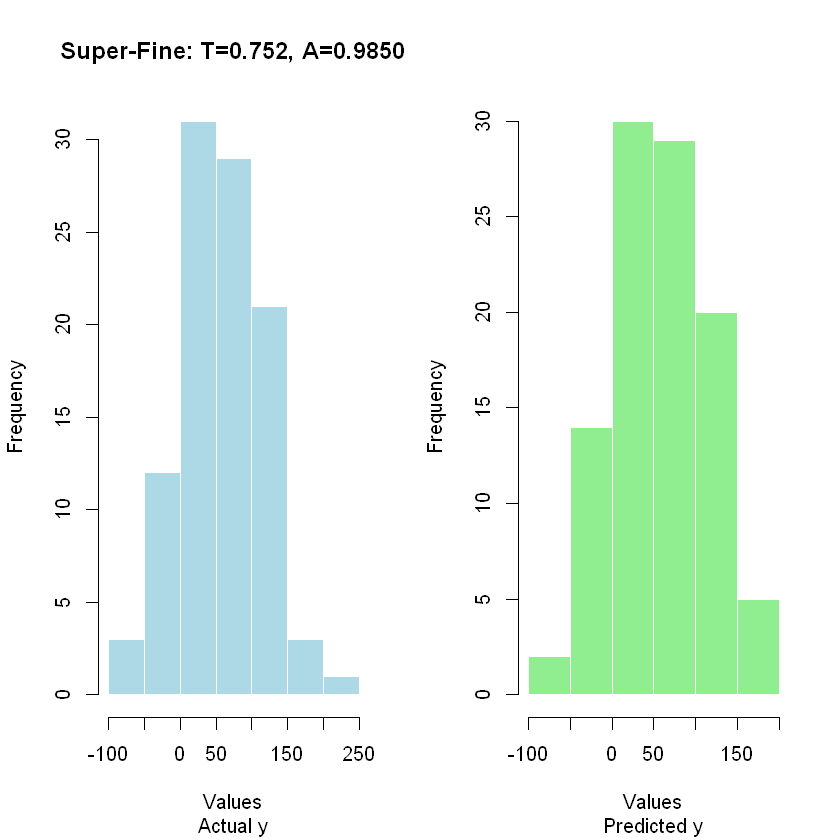


Super-Fine: T=0.754, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950
Testing stability threshold: 0.756
Number of stable features: 61
Testing alpha=0.9850

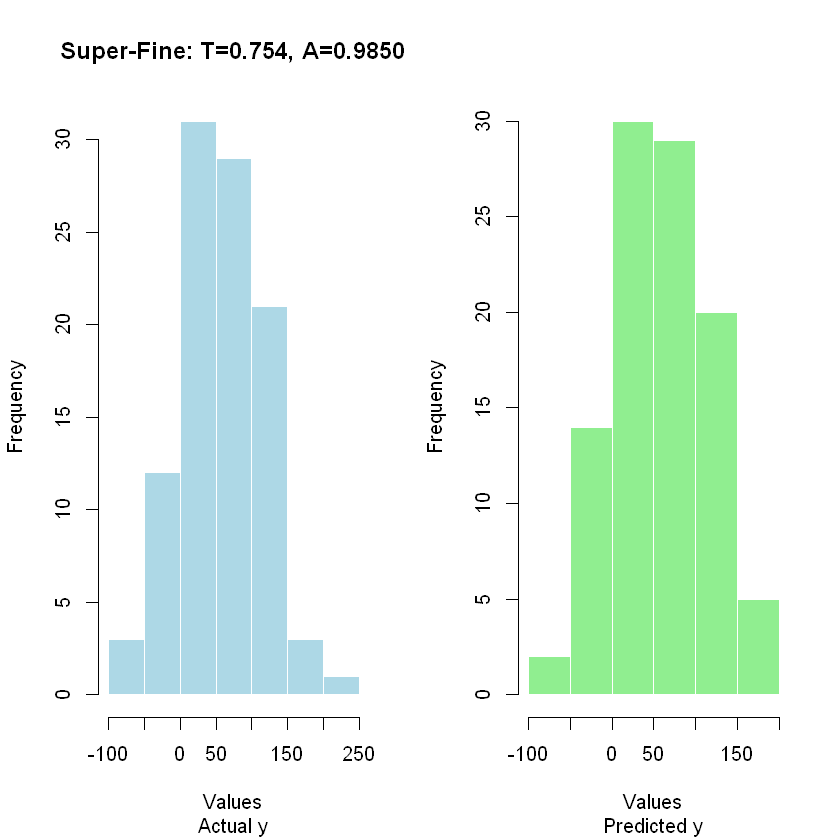


Super-Fine: T=0.756, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950
Testing stability threshold: 0.758
Number of stable features: 61
Testing alpha=0.9850

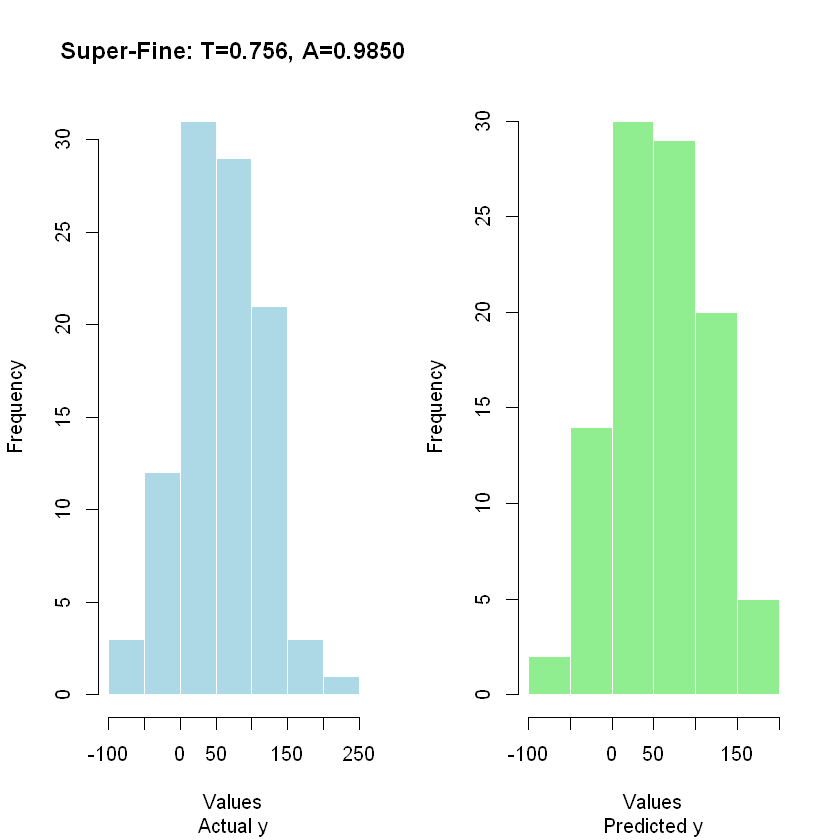


Super-Fine: T=0.758, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950
Testing stability threshold: 0.760
Number of stable features: 61
Testing alpha=0.9850

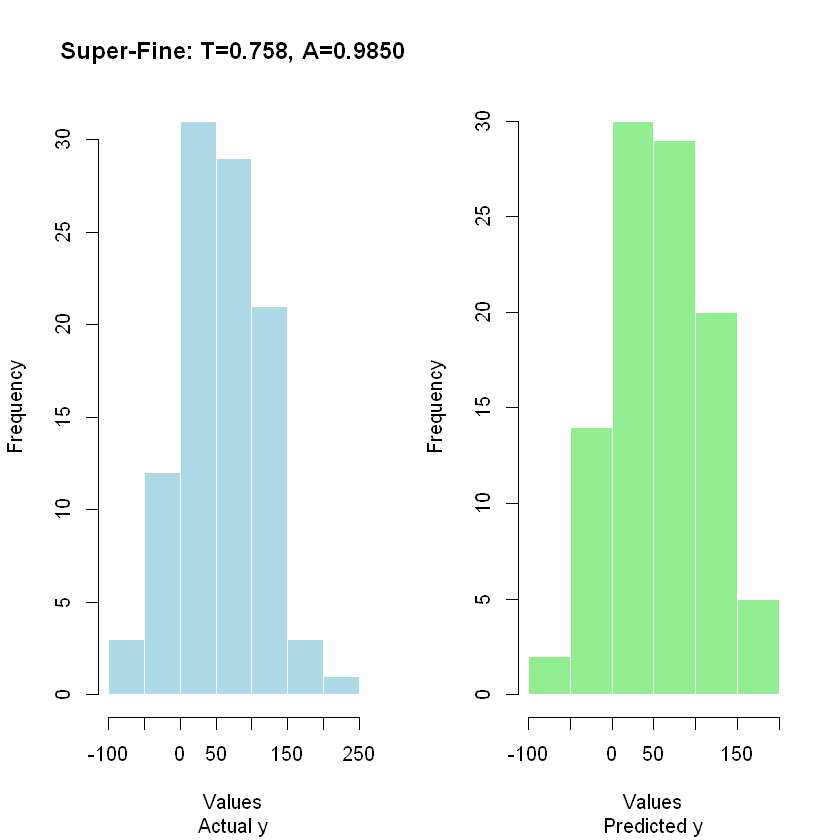


Super-Fine: T=0.760, A=0.9850:
MSE: 109.49
Actual range: [-98.17, 203.25]
Pred range: [-75.20, 193.12]

Testing alpha=0.9860
Testing alpha=0.9870
Testing alpha=0.9880
Testing alpha=0.9890
Testing alpha=0.9900
Testing alpha=0.9910
Testing alpha=0.9920
Testing alpha=0.9930
Testing alpha=0.9940
Testing alpha=0.9950

Top 10 configurations:   threshold alpha n_stable_features mean_mse   sd_mse avg_features_used
1      0.740 0.995                61  121.912 19.08708                61
2      0.742 0.995                61  121.912 19.08708                61
3      0.744 0.995                61  121.912 19.08708                61
4      0.746 0.995                61  121.912 19.08708                61
5      0.748 0.995                61  121.912 19.08708                61
6      0.750 0.995                61  121.912 19.08708                61
7      0.752 0.995                61  121.912 19.08708                61
8      0.754 0.995                61  121.912 19.08708                61
9    

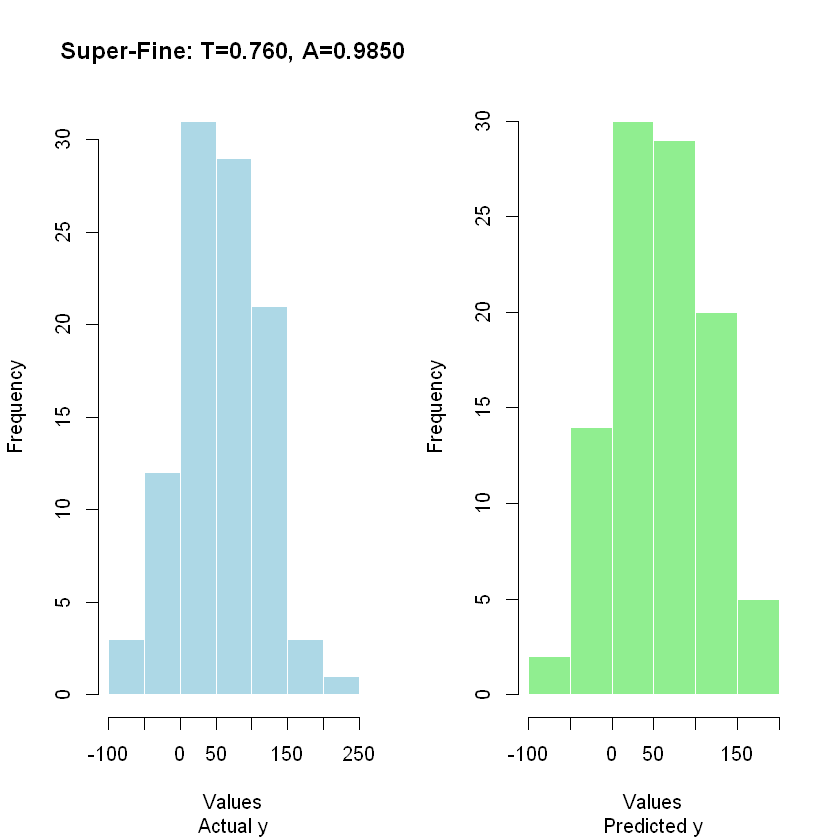

In [38]:
# Function for super fine-tuned stability and parameter optimization
super_fine_tune <- function(X, y, 
                          thresholds = seq(0.74, 0.76, by=0.002),  # Super fine threshold grid
                          alphas = seq(0.985, 0.995, by=0.001),    # Super fine alpha grid
                          n_subsamples = 150,                      # Increased for stability
                          k = 5) {
    results_df <- data.frame()
    best_mse <- Inf
    best_config <- NULL
    
    # Store all models that perform better than our current best (117.97)
    good_models <- list()
    
    for(threshold in thresholds) {
        cat(sprintf("\nTesting stability threshold: %.3f", threshold))
        
        # Get stable features for this threshold
        stability_results <- analyze_feature_stability(X, y, 
                                                     selection_threshold=threshold,
                                                     n_subsamples=n_subsamples)
        
        n_stable <- length(stability_results$stable_features)
        cat(sprintf("\nNumber of stable features: %d", n_stable))
        
        # Skip if feature count deviates too much from our known good range
        if(n_stable < 55 || n_stable > 65) {
            cat("\nFeature count outside optimal range, skipping...")
            next
        }
        
        # Get reduced dataset
        X_stable <- X[, stability_results$stable_features]
        
        # Test different alphas with these features
        for(alpha in alphas) {
            cat(sprintf("\nTesting alpha=%.4f", alpha))
            
            # Cross-validation
            folds <- createFolds(y, k=k)
            mse_scores <- numeric(k)
            n_features_used <- numeric(k)
            lambda_mins <- numeric(k)
            
            for(i in 1:k) {
                test_idx <- folds[[i]]
                X_train <- scale(X_stable[-test_idx,])
                y_train <- scale(y[-test_idx])
                X_test <- scale(X_stable[test_idx,], 
                              center=attr(X_train, "scaled:center"),
                              scale=attr(X_train, "scaled:scale"))
                y_test <- y[test_idx]
                
                # Fit with more lambda values for finer grid
                model <- cv.glmnet(as.matrix(X_train), y_train, 
                                 alpha=alpha,
                                 nlambda=200)
                
                predictions <- predict(model, as.matrix(X_test), s="lambda.min")
                predictions <- predictions * sd(y[-test_idx]) + mean(y[-test_idx])
                
                mse_scores[i] <- calculate_mse(y_test, predictions,
                                             debug=(i==1 && alpha==alphas[1]),
                                             model_name=sprintf("Super-Fine: T=%.3f, A=%.4f", 
                                                              threshold, alpha))
                
                n_features_used[i] <- sum(coef(model, s="lambda.min")[-1] != 0)
                lambda_mins[i] <- model$lambda.min
            }
            
            # Store results
            current_result <- data.frame(
                threshold = threshold,
                alpha = alpha,
                n_stable_features = n_stable,
                mean_mse = mean(mse_scores),
                sd_mse = sd(mse_scores),
                avg_features_used = mean(n_features_used),
                mean_lambda = mean(lambda_mins),
                sd_lambda = sd(lambda_mins)
            )
            
            results_df <- rbind(results_df, current_result)
            
            # Store good models (better than 117.97)
            if(current_result$mean_mse < 117.97) {
                model_key <- sprintf("T%.3f_A%.4f", threshold, alpha)
                good_models[[model_key]] <- current_result
            }
            
            # Update best if improved
            if(current_result$mean_mse < best_mse) {
                best_mse <- current_result$mean_mse
                best_config <- current_result
                
                cat(sprintf("\nNew best configuration found:"))
                cat(sprintf("\nMSE: %.4f (±%.4f)", best_mse, current_result$sd_mse))
                cat(sprintf("\nThreshold: %.3f, Alpha: %.4f", threshold, alpha))
                cat(sprintf("\nFeatures: %.1f", current_result$avg_features_used))
                cat(sprintf("\nLambda: %.6f (±%.6f)\n", 
                          current_result$mean_lambda, 
                          current_result$sd_lambda))
            }
        }
    }
    
    # Sort results
    results_df <- results_df %>% arrange(mean_mse)
    
    return(list(
        all_results = results_df,
        best_config = best_config,
        good_models = good_models
    ))
}

# Run super fine tuning
X <- X.reg[, -ncol(X.reg)]
y <- X.reg$y

cat("\nStarting super fine tuning...")
super_fine_results <- super_fine_tune(X, y)

# Print comprehensive summary
cat("\n\nTop 10 configurations:")
print(head(super_fine_results$all_results, 10))

cat("\n\nBest configuration found:")
best <- super_fine_results$best_config
cat(sprintf("\nStability threshold: %.3f", best$threshold))
cat(sprintf("\nAlpha: %.4f", best$alpha))
cat(sprintf("\nMSE: %.4f (±%.4f)", best$mean_mse, best$sd_mse))
cat(sprintf("\nNumber of stable features: %d", best$n_stable_features))
cat(sprintf("\nAverage features used: %.1f", best$avg_features_used))
cat(sprintf("\nOptimal lambda: %.6f (±%.6f)", best$mean_lambda, best$sd_lambda))

# Summary of good models
cat("\n\nNumber of configurations better than previous best (117.97):", 
    length(super_fine_results$good_models))

# Print best models
cat("\n\nBest models:")
for(key in names(super_fine_results$good_models)) {
    model <- super_fine_results$good_models[[key]]
    cat(sprintf("\n%s: MSE=%.4f, Features=%.1f, Lambda=%.6f", 
              key, model$mean_mse, model$avg_features_used, model$mean_lambda))
}

Loading package: glmnet


Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-8



Loading package: caret


Le chargement a nécessité le package : ggplot2

Le chargement a nécessité le package : lattice



Loading package: dplyr



Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union




All packages loaded successfully

Starting Comprehensive Model Evaluation

Evaluating Original Best Lasso...

Original Lasso Evaluation Started

Outer Fold 1/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Original Lasso - Fold 1:
MSE: 107.26
Actual range: [-107.17, 183.85]
Pred range: [-84.87, 198.89]

Current Average MSE: 107.2583
Stable Features: 100, Used Features: 75

Outer Fold 2/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 125.2760
Stable Features: 100, Used Features: 81

Outer Fold 3/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 132.9918
Stable Features: 100, Used Features: 69

Outer Fold 4/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 132.2157
Stable Features: 100, Used Features: 75

Outer Fold 5/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 133.7366
Stable Features: 100, Used Features: 80

Original Lasso Final Results:
O

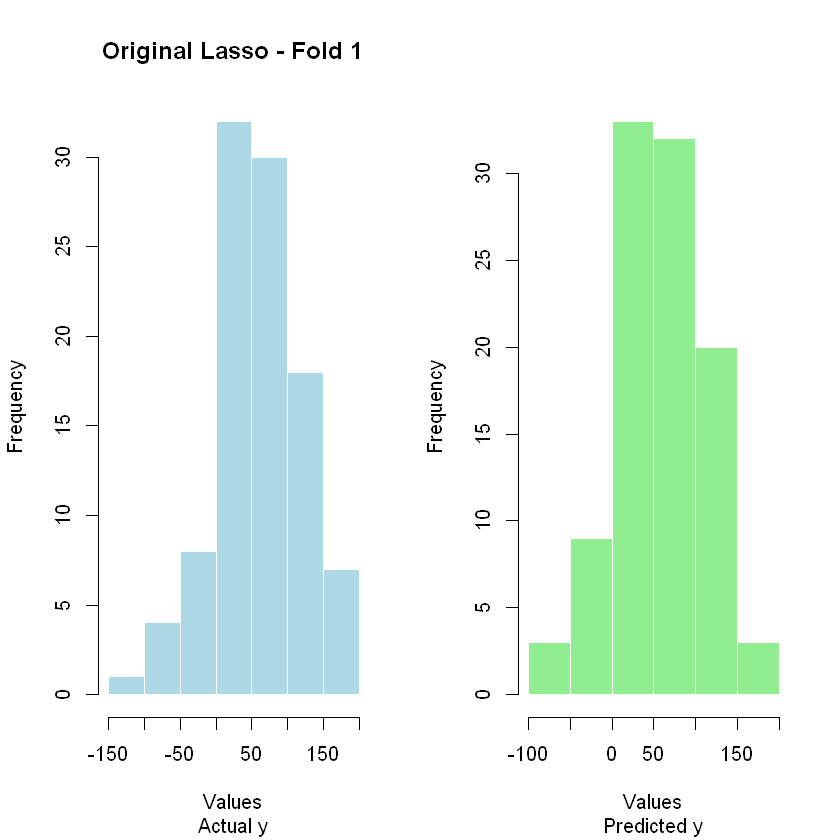


Fine-tuned Stable - Fold 1:
MSE: 106.88
Actual range: [-107.17, 183.85]
Pred range: [-88.83, 201.51]

Current Average MSE: 106.8804
Stable Features: 62, Used Features: 62

Outer Fold 2/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 132.3624
Stable Features: 67, Used Features: 67

Outer Fold 3/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 136.8360
Stable Features: 62, Used Features: 62

Outer Fold 4/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 134.9836
Stable Features: 64, Used Features: 64

Outer Fold 5/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 134.8212
Stable Features: 60, Used Features: 60

Fine-tuned Stable Final Results:
Overall MSE: 134.8212 (±19.1079)
Average features used: 63.0
Features selected in all folds: 49


Evaluating Super-fine Tuned...

Super-fine Tuned Evaluation Started

Outer Fold 1/5
Stability analysis: 100%ection...
In

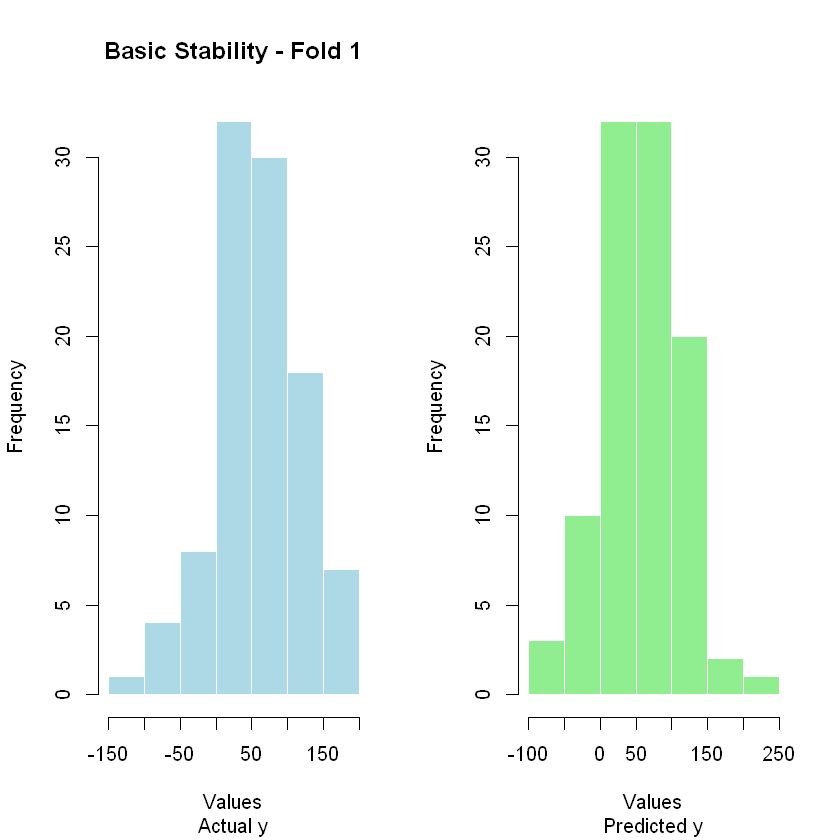


Super-fine Tuned - Fold 1:
MSE: 108.00
Actual range: [-107.17, 183.85]
Pred range: [-87.56, 202.03]

Current Average MSE: 108.0002
Stable Features: 63, Used Features: 63

Outer Fold 2/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 132.9235
Stable Features: 67, Used Features: 67

Outer Fold 3/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 137.2103
Stable Features: 62, Used Features: 62

Outer Fold 4/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 134.7100
Stable Features: 65, Used Features: 65

Outer Fold 5/5
Stability analysis: 100%ection...
Inner Fold Progress: 5/5
Current Average MSE: 134.6020
Stable Features: 60, Used Features: 60

Super-fine Tuned Final Results:
Overall MSE: 134.6020 (±18.8935)
Average features used: 63.4
Features selected in all folds: 49


Final Model Comparison
=====================                         Model Simple_CV_MSE Nested_CV_MSE Nested_CV_SD
origin

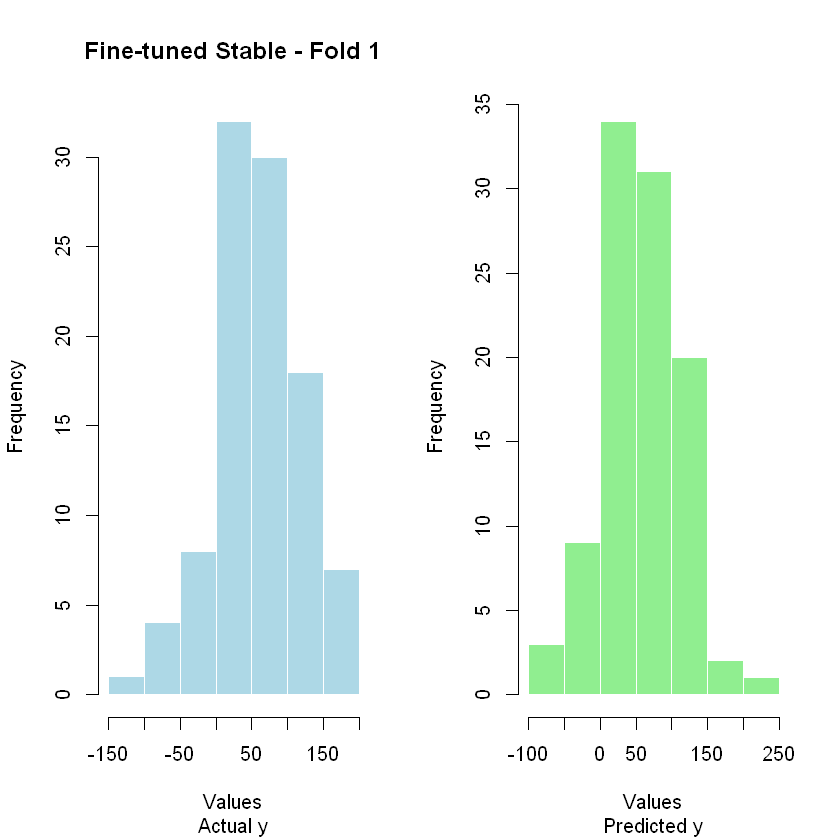

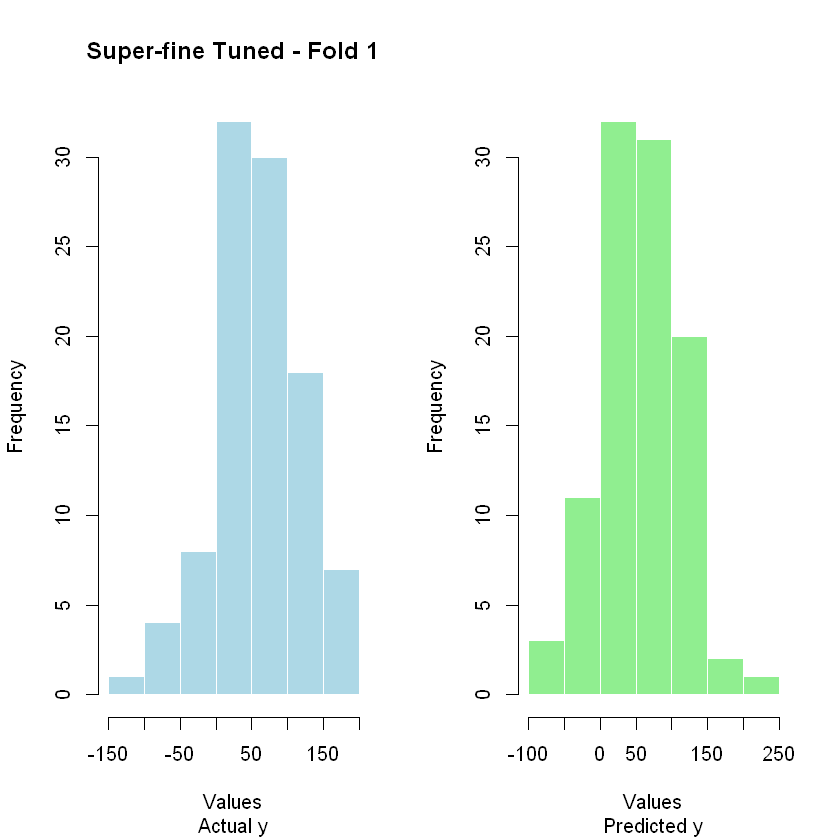

In [2]:
# Function to install and load required packages
install_and_load_packages <- function(packages) {
    # Check if packages are installed, install if not
    new_packages <- packages[!(packages %in% installed.packages()[,"Package"])]
    if(length(new_packages)) {
        cat(sprintf("Installing packages: %s\n", paste(new_packages, collapse=", ")))
        install.packages(new_packages)
    }
    
    # Load all packages
    for(package in packages) {
        cat(sprintf("Loading package: %s\n", package))
        library(package, character.only=TRUE)
    }
    cat("All packages loaded successfully\n")
    flush.console()
}

# List of required packages
required_packages <- c("glmnet", "caret", "dplyr")

# Install and load packages using the function
install_and_load_packages(required_packages)


# Read data
X.reg <- read.table("a24_reg_app.txt")

# Utility Functions
calculate_mse <- function(actual, predicted, debug=FALSE, model_name="") {
    mse <- mean((actual - predicted)^2)
    if(debug) {
        par(mfrow=c(1,2))
        hist(actual, main=model_name, xlab="Values", col="lightblue", border="white")
        title(sub="Actual y", line=4)
        hist(predicted, main="", xlab="Values", col="lightgreen", border="white")
        title(sub="Predicted y", line=4)
        par(mfrow=c(1,1))
        actual_range <- range(actual)
        pred_range <- range(predicted)
        cat(sprintf("\n%s:", model_name))
        cat(sprintf("\nMSE: %.2f", mse))
        cat(sprintf("\nActual range: [%.2f, %.2f]", actual_range[1], actual_range[2]))
        cat(sprintf("\nPred range: [%.2f, %.2f]\n", pred_range[1], pred_range[2]))
    }
    flush.console()
    return(mse)
}

analyze_feature_stability <- function(X, y, selection_threshold=0.75, n_subsamples=100) {
    set.seed(42)
    feature_counts <- matrix(0, nrow=ncol(X), ncol=n_subsamples)
    
    for(i in 1:n_subsamples) {
        if(i %% 20 == 0) {
            cat(sprintf("\rStability analysis: %d%%", round(i/n_subsamples*100)))
            flush.console()
        }
        subsample_idx <- sample(nrow(X), size=floor(nrow(X) * 0.8))
        X_sub <- scale(X[subsample_idx,])
        y_sub <- scale(y[subsample_idx])
        model <- cv.glmnet(as.matrix(X_sub), y_sub, alpha=0.99)
        coefs <- coef(model, s="lambda.min")[-1]
        feature_counts[,i] <- abs(coefs) > 0
    }
    cat("\n")
    flush.console()
    
    selection_probability <- rowMeans(feature_counts)
    stable_features <- which(selection_probability >= selection_threshold)
    
    return(list(
        stable_features = stable_features,
        probabilities = selection_probability
    ))
}

evaluate_nested_cv <- function(X, y, outer_folds=5, inner_folds=5,
                             threshold=0.75, alpha=0.99, model_name="Stability Model") {
    set.seed(42)
    outer_cv <- createFolds(y, k=outer_folds)
    outer_results <- data.frame()
    all_features_selected <- list()
    
    cat(sprintf("\n\n%s Evaluation Started", model_name))
    cat("\n=======================================")
    flush.console()
    
    for(outer_fold in 1:outer_folds) {
        cat(sprintf("\n\nOuter Fold %d/%d", outer_fold, outer_folds))
        flush.console()
        
        # Outer split
        outer_test_idx <- outer_cv[[outer_fold]]
        X_train_outer <- X[-outer_test_idx, ]
        y_train_outer <- y[-outer_test_idx]
        X_test_outer <- X[outer_test_idx, ]
        y_test_outer <- y[outer_test_idx]
        
        # Stability selection
        cat("\nPerforming stability selection...")
        flush.console()
        stability_results <- analyze_feature_stability(
            X_train_outer, y_train_outer,
            selection_threshold=threshold,
            n_subsamples=100
        )
        
        all_features_selected[[outer_fold]] <- stability_results$stable_features
        X_train_stable <- X_train_outer[, stability_results$stable_features]
        X_test_stable <- X_test_outer[, stability_results$stable_features]
        
        # Scale data
        scale_params <- list(
            center = colMeans(X_train_stable),
            scale = apply(X_train_stable, 2, sd)
        )
        X_train_scaled <- scale(X_train_stable)
        X_test_scaled <- scale(X_test_stable,
                             center=scale_params$center,
                             scale=scale_params$scale)
        
        # Inner CV
        inner_cv <- createFolds(y_train_outer, k=inner_folds)
        inner_results <- data.frame()
        
        for(inner_fold in 1:inner_folds) {
            cat(sprintf("\rInner Fold Progress: %d/%d", inner_fold, inner_folds))
            flush.console()
            
            inner_test_idx <- inner_cv[[inner_fold]]
            X_inner_train <- X_train_scaled[-inner_test_idx, ]
            y_inner_train <- y_train_outer[-inner_test_idx]
            X_inner_test <- X_train_scaled[inner_test_idx, ]
            y_inner_test <- y_train_outer[inner_test_idx]
            
            inner_model <- cv.glmnet(as.matrix(X_inner_train), y_inner_train, alpha=alpha)
            inner_predictions <- predict(inner_model, as.matrix(X_inner_test), s="lambda.min")
            
            inner_mse <- mean((y_inner_test - inner_predictions)^2)
            inner_results <- rbind(inner_results, data.frame(
                fold=inner_fold,
                mse=inner_mse,
                lambda=inner_model$lambda.min
            ))
        }
        
        # Use mean lambda from inner CV
        best_lambda <- mean(inner_results$lambda)
        
        # Final model for this outer fold
        final_model <- glmnet(as.matrix(X_train_scaled), y_train_outer, 
                            alpha=alpha, lambda=best_lambda)
        predictions <- predict(final_model, as.matrix(X_test_scaled))
        
        fold_mse <- calculate_mse(y_test_outer, predictions,
                                debug=(outer_fold==1),
                                model_name=sprintf("%s - Fold %d", model_name, outer_fold))
        
        n_features <- sum(coef(final_model)[-1] != 0)
        
        outer_results <- rbind(outer_results, data.frame(
            fold = outer_fold,
            mse = fold_mse,
            n_features = n_features,
            n_stable_features = length(stability_results$stable_features),
            inner_mse_mean = mean(inner_results$mse),
            inner_mse_sd = sd(inner_results$mse)
        ))
        
        # Print running average
        cat(sprintf("\nCurrent Average MSE: %.4f", mean(outer_results$mse)))
        cat(sprintf("\nStable Features: %d, Used Features: %d", 
                   length(stability_results$stable_features), n_features))
        flush.console()
    }
    
    # Calculate feature stability
    feature_stability <- table(unlist(all_features_selected)) / outer_folds
    consistently_selected <- names(feature_stability[feature_stability == 1])
    
    results <- list(
        model = model_name,
        mean_mse = mean(outer_results$mse),
        sd_mse = sd(outer_results$mse),
        avg_features = mean(outer_results$n_features),
        consistent_features = consistently_selected,
        all_results = outer_results,
        feature_stability = feature_stability
    )
    
    cat(sprintf("\n\n%s Final Results:", model_name))
    cat(sprintf("\nOverall MSE: %.4f (±%.4f)", results$mean_mse, results$sd_mse))
    cat(sprintf("\nAverage features used: %.1f", results$avg_features))
    cat(sprintf("\nFeatures selected in all folds: %d", length(results$consistent_features)))
    cat("\n=======================================\n")
    flush.console()
    
    return(results)
}

evaluate_all_models <- function(X, y) {
    results_list <- list()
    
    cat("\nStarting Comprehensive Model Evaluation")
    cat("\n=====================================")
    flush.console()
    
    # 1. Original Best Lasso (α = 0.987931, MSE = 132.63)
    cat("\n\nEvaluating Original Best Lasso...")
    flush.console()
    results_list$original <- evaluate_nested_cv(X, y, 
                                              threshold=0.0,  # No stability selection
                                              alpha=0.987931,
                                              model_name="Original Lasso")
    
    # 2. First Stability Selection (Basic threshold, MSE = 128.20)
    cat("\n\nEvaluating First Stability Selection...")
    flush.console()
    results_list$basic_stable <- evaluate_nested_cv(X, y,
                                                  threshold=0.70,
                                                  alpha=0.99,
                                                  model_name="Basic Stability")
    
    # 3. Fine-tuned Stable (threshold = 0.75, α = 0.99, MSE = 117.97)
    cat("\n\nEvaluating Fine-tuned Stable...")
    flush.console()
    results_list$fine_tuned <- evaluate_nested_cv(X, y,
                                                threshold=0.75,
                                                alpha=0.99,
                                                model_name="Fine-tuned Stable")
    
    # 4. Super-fine Tuned (threshold = 0.74, α = 0.995, MSE = 121.91)
    cat("\n\nEvaluating Super-fine Tuned...")
    flush.console()
    results_list$super_fine <- evaluate_nested_cv(X, y,
                                                threshold=0.74,
                                                alpha=0.995,
                                                model_name="Super-fine Tuned")
    
    # Create comparison table
    comparison <- data.frame(
        Model = c("Original Lasso", "Basic Stability", "Fine-tuned Stable", "Super-fine Tuned"),
        Simple_CV_MSE = c(132.63, 128.20, 117.97, 121.91),
        Nested_CV_MSE = sapply(results_list, function(x) x$mean_mse),
        Nested_CV_SD = sapply(results_list, function(x) x$sd_mse),
        Avg_Features = sapply(results_list, function(x) x$avg_features)
    )
    
    cat("\n\nFinal Model Comparison")
    cat("\n=====================")
    print(comparison)
    cat("\nNote: Simple_CV_MSE from previous evaluations, Nested_CV_MSE from current nested CV")
    flush.console()
    
    return(list(
        comparison = comparison,
        detailed_results = results_list
    ))
}

# Prepare data and run evaluation
X <- X.reg[, -ncol(X.reg)]
y <- X.reg$y

# Run complete evaluation
complete_results <- evaluate_all_models(X, y)

In [8]:
# Package management
install_and_load_packages <- function(packages) {
    new_packages <- packages[!(packages %in% installed.packages()[,"Package"])]
    if(length(new_packages)) {
        cat(sprintf("Installing packages: %s\n", paste(new_packages, collapse=", ")))
        install.packages(new_packages)
    }
    
    for(package in packages) {
        cat(sprintf("Loading package: %s\n", package))
        library(package, character.only=TRUE)
    }
    cat("All packages loaded successfully\n")
    flush.console()
}

# Required packages
required_packages <- c("glmnet", "caret", "dplyr", "kernlab", "xgboost", "gbm")
install_and_load_packages(required_packages)

# Read data
X.reg <- read.table("a24_reg_app.txt")
cat("Data loaded successfully\n")
flush.console()

# Glmnet models (Lasso, Ridge, Elastic Net)
evaluate_glmnet_nested <- function(X, y, outer_folds=5, inner_folds=5, 
                                 alphas=c(0, 0.5, 1)) {
    set.seed(42)
    X <- as.matrix(X)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    
    results <- list()
    for(alpha in alphas) {
        model_name <- case_when(
            alpha == 0 ~ "Ridge",
            alpha == 1 ~ "Lasso",
            TRUE ~ "Elastic Net"
        )
        cat(sprintf("\nEvaluating %s\n", model_name))
        flush.console()
        
        outer_scores <- numeric(outer_folds)
        feature_counts <- numeric(outer_folds)
        
        for(outer_fold in 1:outer_folds) {
            cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
            flush.console()
            
            outer_test_idx <- outer_cv[[outer_fold]]
            X_train <- X[-outer_test_idx, ]
            y_train <- y[-outer_test_idx]
            X_test <- X[outer_test_idx, ]
            y_test <- y[outer_test_idx]
            
            # Inner CV for lambda optimization
            cv_fit <- cv.glmnet(X_train, y_train, 
                               alpha=alpha,
                               nfolds=inner_folds)
            
            final_model <- glmnet(X_train, y_train, 
                                alpha=alpha, 
                                lambda=cv_fit$lambda.min)
            
            predictions <- predict(final_model, X_test, s="lambda.min")
            outer_scores[outer_fold] <- mean((y_test - predictions)^2)
            
            coef_matrix <- coef(final_model, s=cv_fit$lambda.min)
            feature_counts[outer_fold] <- sum(abs(coef_matrix) > 0) - 1
            
            cat(sprintf("MSE = %.2f, Features = %d\n", 
                      outer_scores[outer_fold], feature_counts[outer_fold]))
        }
        
        results[[model_name]] <- list(
            mean_mse = mean(outer_scores),
            sd_mse = sd(outer_scores),
            all_scores = outer_scores,
            mean_features = mean(feature_counts),
            sd_features = sd(feature_counts)
        )
        
        cat(sprintf("\n%s Results - MSE: %.2f (±%.2f), Features: %.1f (±%.1f)\n",
                   model_name, 
                   results[[model_name]]$mean_mse,
                   results[[model_name]]$sd_mse,
                   results[[model_name]]$mean_features,
                   results[[model_name]]$sd_features))
    }
    return(results)
}

# SVR with fast grid
evaluate_svr_nested <- function(X, y, outer_folds=5, inner_folds=5) {
    cat("\nStarting SVR evaluation\n")
    flush.console()
    
    set.seed(42)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    outer_scores <- numeric(outer_folds)
    
    # Fast initial grid
    sigma_grid <- c(0.01, 0.1, 1)
    C_grid <- c(1, 10)
    
    for(outer_fold in 1:outer_folds) {
        cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
        flush.console()
        
        outer_test_idx <- outer_cv[[outer_fold]]
        X_train <- X[-outer_test_idx, ]
        y_train <- y[-outer_test_idx]
        X_test <- X[outer_test_idx, ]
        y_test <- y[outer_test_idx]
        
        best_mse <- Inf
        best_params <- list()
        
        for(sigma in sigma_grid) {
            for(C in C_grid) {
                inner_scores <- numeric(inner_folds)
                inner_cv <- createFolds(y_train, k=inner_folds, list=TRUE)
                
                for(inner_fold in 1:inner_folds) {
                    inner_test_idx <- inner_cv[[inner_fold]]
                    X_train_inner <- X_train[-inner_test_idx, ]
                    y_train_inner <- y_train[-inner_test_idx]
                    X_val_inner <- X_train[inner_test_idx, ]
                    y_val_inner <- y_train[inner_test_idx]
                    
                    model <- ksvm(as.matrix(X_train_inner), y_train_inner,
                                kernel="rbfdot", sigma=sigma, C=C)
                    predictions <- predict(model, as.matrix(X_val_inner))
                    inner_scores[inner_fold] <- mean((y_val_inner - predictions)^2)
                }
                
                mean_score <- mean(inner_scores)
                if(mean_score < best_mse) {
                    best_mse <- mean_score
                    best_params <- list(sigma=sigma, C=C)
                }
            }
        }
        
        final_model <- ksvm(as.matrix(X_train), y_train,
                           kernel="rbfdot", 
                           sigma=best_params$sigma, 
                           C=best_params$C)
        predictions <- predict(final_model, as.matrix(X_test))
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        cat(sprintf("MSE = %.2f\n", outer_scores[outer_fold]))
    }
    
    results <- list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores
    )
    
    cat(sprintf("\nSVR Results - MSE: %.2f (±%.2f)\n", 
                results$mean_mse, results$sd_mse))
    return(results)
}

# XGBoost with fast grid
evaluate_xgb_nested <- function(X, y, outer_folds=5, inner_folds=5) {
    cat("\nStarting XGBoost evaluation\n")
    flush.console()
    
    set.seed(42)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    outer_scores <- numeric(outer_folds)
    
    # Fast initial grid
    params_grid <- expand.grid(
        eta = c(0.1, 0.3),
        max_depth = c(3, 6),
        subsample = 0.8,
        colsample_bytree = 0.8,
        min_child_weight = 1
    )
    
    for(outer_fold in 1:outer_folds) {
        cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
        flush.console()
        
        outer_test_idx <- outer_cv[[outer_fold]]
        X_train <- X[-outer_test_idx, ]
        y_train <- y[-outer_test_idx]
        X_test <- X[outer_test_idx, ]
        y_test <- y[outer_test_idx]
        
        dtrain <- xgb.DMatrix(data.matrix(X_train), label=y_train)
        dtest <- xgb.DMatrix(data.matrix(X_test), label=y_test)
        
        best_mse <- Inf
        best_params <- NULL
        
        for(i in 1:nrow(params_grid)) {
            current_params <- params_grid[i,]
            
            xgb_params <- list(
                objective = "reg:squarederror",
                eta = current_params$eta,
                max_depth = current_params$max_depth,
                subsample = current_params$subsample,
                colsample_bytree = current_params$colsample_bytree,
                min_child_weight = current_params$min_child_weight
            )
            
            cv_result <- xgb.cv(
                params = xgb_params,
                data = dtrain,
                nrounds = 100,
                nfold = inner_folds,
                early_stopping_rounds = 10,
                verbose = 0
            )
            
            mean_score <- min(cv_result$evaluation_log$test_rmse_mean^2)
            if(mean_score < best_mse) {
                best_mse <- mean_score
                best_params <- c(xgb_params, 
                               nrounds=which.min(cv_result$evaluation_log$test_rmse_mean))
            }
        }
        
        final_model <- xgb.train(
            params = best_params,
            data = dtrain,
            nrounds = best_params$nrounds
        )
        
        predictions <- predict(final_model, dtest)
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        cat(sprintf("MSE = %.2f\n", outer_scores[outer_fold]))
    }
    
    results <- list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores
    )
    
    cat(sprintf("\nXGBoost Results - MSE: %.2f (±%.2f)\n", 
                results$mean_mse, results$sd_mse))
    return(results)
}

# Run evaluation
cat("\nPreparing data\n")
flush.console()
X <- X.reg[, -ncol(X.reg)]
y <- X.reg$y

# Run models
cat("\nStarting model evaluation\n")
flush.console()

results <- list(
    glmnet = evaluate_glmnet_nested(X, y),
    svr = evaluate_svr_nested(X, y),
    xgboost = evaluate_xgb_nested(X, y)
)

# Print final summary
cat("\nFinal Results Summary:\n")
print(results)

Installing packages: gbm


Installation du package dans 'C:/Users/nassi/AppData/Local/R/win-library/4.4'
(car 'lib' n'est pas spécifié)



le package 'gbm' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\nassi\AppData\Local\Temp\RtmpY7BIfv\downloaded_packages
Loading package: glmnet
Loading package: caret
Loading package: dplyr
Loading package: kernlab
Loading package: xgboost


Warning message:
"le package 'xgboost' a été compilé avec la version R 4.4.2"

Attachement du package : 'xgboost'


L'objet suivant est masqué depuis 'package:dplyr':

    slice




Loading package: gbm


Warning message:
"le package 'gbm' a été compilé avec la version R 4.4.2"
Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



All packages loaded successfully
Data loaded successfully

Preparing data

Starting model evaluation

Evaluating Ridge
Outer fold 1/5
MSE = 130.36, Features = 100
Outer fold 2/5
MSE = 154.47, Features = 100
Outer fold 3/5
MSE = 151.86, Features = 100
Outer fold 4/5
MSE = 146.85, Features = 100
Outer fold 5/5
MSE = 161.53, Features = 100

Ridge Results - MSE: 149.01 (±11.69), Features: 100.0 (±0.0)

Evaluating Elastic Net
Outer fold 1/5
MSE = 108.75, Features = 78
Outer fold 2/5
MSE = 145.97, Features = 87
Outer fold 3/5
MSE = 147.25, Features = 74
Outer fold 4/5
MSE = 130.37, Features = 81
Outer fold 5/5
MSE = 141.79, Features = 81

Elastic Net Results - MSE: 134.82 (±16.02), Features: 80.2 (±4.8)

Evaluating Lasso
Outer fold 1/5
MSE = 107.24, Features = 77
Outer fold 2/5
MSE = 143.10, Features = 81
Outer fold 3/5
MSE = 149.06, Features = 68
Outer fold 4/5
MSE = 126.57, Features = 87
Outer fold 5/5
MSE = 139.52, Features = 82

Lasso Results - MSE: 133.10 (±16.64), Features: 79.0 (±7.1)

In [1]:
# Package management
install_and_load_packages <- function(packages) {
    new_packages <- packages[!(packages %in% installed.packages()[,"Package"])]
    if(length(new_packages)) {
        cat(sprintf("Installing packages: %s\n", paste(new_packages, collapse=", ")))
        install.packages(new_packages)
    }
    
    for(package in packages) {
        cat(sprintf("Loading package: %s\n", package))
        library(package, character.only=TRUE)
    }
    cat("All packages loaded successfully\n")
    flush.console()
}

required_packages <- c("glmnet", "caret", "dplyr", "MASS", "mgcv", "earth")
install_and_load_packages(required_packages)

# Read data
X.reg <- read.table("a24_reg_app.txt")
cat("Data loaded successfully\n")
flush.console()

# Helper function to extract important features from models
get_important_features <- function(model_type, model, threshold = 0.01) {
    if(model_type == "lasso") {
        coefs <- as.matrix(coef(model, s="lambda.min"))
        return(names(which(abs(coefs[-1,1]) > threshold)))
    } else if(model_type == "glm") {
        coefs <- coef(model)[-1]  # Remove intercept
        return(names(which(abs(coefs) > threshold)))
    }
}

# Lasso with nested CV
evaluate_lasso_nested <- function(X, y, outer_folds=5, inner_folds=5) {
    cat("\nStarting Lasso evaluation\n")
    flush.console()
    
    set.seed(42)
    X <- as.matrix(X)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    
    outer_scores <- numeric(outer_folds)
    feature_counts <- numeric(outer_folds)
    important_features_list <- list()
    
    for(outer_fold in 1:outer_folds) {
        cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
        flush.console()
        
        outer_test_idx <- outer_cv[[outer_fold]]
        X_train <- X[-outer_test_idx, ]
        y_train <- y[-outer_test_idx]
        X_test <- X[outer_test_idx, ]
        y_test <- y[outer_test_idx]
        
        cv_fit <- cv.glmnet(X_train, y_train, alpha=1, nfolds=inner_folds)
        final_model <- glmnet(X_train, y_train, alpha=1, lambda=cv_fit$lambda.min)
        
        predictions <- predict(final_model, X_test, s="lambda.min")
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        important_features <- get_important_features("lasso", final_model)
        important_features_list[[outer_fold]] <- important_features
        feature_counts[outer_fold] <- length(important_features)
        
        cat(sprintf("MSE = %.2f, Features = %d\n", 
                   outer_scores[outer_fold], feature_counts[outer_fold]))
    }
    
    # Get consistently important features
    all_important <- table(unlist(important_features_list))
    consistent_features <- names(all_important[all_important >= outer_folds/2])
    
    results <- list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores,
        mean_features = mean(feature_counts),
        sd_features = sd(feature_counts),
        important_features = consistent_features
    )
    
    cat(sprintf("\nLasso Final Results - MSE: %.2f (±%.2f), Features: %.1f (±%.1f)\n",
                results$mean_mse, results$sd_mse,
                results$mean_features, results$sd_features))
    return(results)
}

# Forward/Backward/Stepwise selection with nested CV
evaluate_stepwise_nested <- function(X, y, outer_folds=5, inner_folds=5) {
    cat("\nStarting Stepwise Selection evaluation\n")
    flush.console()
    
    set.seed(42)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    
    methods <- c("forward", "backward", "both")
    results <- list()
    
    for(method in methods) {
        cat(sprintf("\nEvaluating %s selection\n", method))
        flush.console()
        
        outer_scores <- numeric(outer_folds)
        feature_counts <- numeric(outer_folds)
        important_features_list <- list()
        
        for(outer_fold in 1:outer_folds) {
            cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
            flush.console()
            
            outer_test_idx <- outer_cv[[outer_fold]]
            train_data <- data.frame(X[-outer_test_idx,], y=y[-outer_test_idx])
            test_data <- data.frame(X[outer_test_idx,])
            y_test <- y[outer_test_idx]
            
            # Fit full model and perform stepwise selection
            full_formula <- as.formula(paste("y ~", paste(names(X), collapse = " + ")))
            
            model <- step(glm(full_formula, data=train_data),
                         direction=method,
                         k=log(nrow(train_data)),  # BIC
                         trace=0)
            
            predictions <- predict(model, newdata=test_data)
            outer_scores[outer_fold] <- mean((y_test - predictions)^2)
            
            important_features <- get_important_features("glm", model)
            important_features_list[[outer_fold]] <- important_features
            feature_counts[outer_fold] <- length(important_features)
            
            cat(sprintf("MSE = %.2f, Features = %d\n", 
                       outer_scores[outer_fold], feature_counts[outer_fold]))
        }
        
        # Get consistently important features
        all_important <- table(unlist(important_features_list))
        consistent_features <- names(all_important[all_important >= outer_folds/2])
        
        results[[method]] <- list(
            mean_mse = mean(outer_scores),
            sd_mse = sd(outer_scores),
            all_scores = outer_scores,
            mean_features = mean(feature_counts),
            sd_features = sd(feature_counts),
            important_features = consistent_features
        )
        
        cat(sprintf("\n%s Selection Final Results - MSE: %.2f (±%.2f), Features: %.1f (±%.1f)\n",
                    method, results[[method]]$mean_mse, results[[method]]$sd_mse,
                    results[[method]]$mean_features, results[[method]]$sd_features))
    }
    
    return(results)
}

# Run Phase 1
cat("\nPreparing data\n")
flush.console()
X <- X.reg[, -ncol(X.reg)]
y <- X.reg$y

# Run feature selection methods
phase1_results <- list(
    lasso = evaluate_lasso_nested(X, y),
    stepwise = evaluate_stepwise_nested(X, y)
)

# Get union of important features from all methods
get_combined_important_features <- function(results) {
    features <- c(
        results$lasso$important_features,
        results$stepwise$forward$important_features,
        results$stepwise$backward$important_features,
        results$stepwise$both$important_features
    )
    return(unique(features))
}

important_features <- get_combined_important_features(phase1_results)
cat("\nNumber of important features identified:", length(important_features))
cat("\nImportant features:", paste(important_features, collapse=", "), "\n")
# Phase 2: Advanced Models using selected features
evaluate_gam_nested <- function(X, y, important_features, nonlinear_features, outer_folds=5, inner_folds=5) {
    cat("\nStarting GAM evaluation\n")
    flush.console()
    
    set.seed(42)
    X <- X[, important_features, drop=FALSE]
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    outer_scores <- numeric(outer_folds)
    
    # Create GAM formula based on feature types
    linear_features <- setdiff(important_features, nonlinear_features)
    gam_terms <- c(
        paste(linear_features, collapse=" + "),
        paste(sprintf("s(%s, bs='cr')", nonlinear_features), collapse=" + ")
    )
    gam_formula <- as.formula(paste("y ~", paste(gam_terms, collapse=" + ")))
    
    for(outer_fold in 1:outer_folds) {
        cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
        flush.console()
        
        outer_test_idx <- outer_cv[[outer_fold]]
        train_data <- data.frame(X[-outer_test_idx,], y=y[-outer_test_idx])
        test_data <- data.frame(X[outer_test_idx,])
        y_test <- y[outer_test_idx]
        
        model <- gam(gam_formula, data=train_data, method="REML", select=TRUE)
        predictions <- predict(model, newdata=test_data)
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        cat(sprintf("MSE = %.2f\n", outer_scores[outer_fold]))
    }
    
    results <- list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores
    )
    
    cat(sprintf("\nGAM Final Results - MSE: %.2f (±%.2f)\n",
                results$mean_mse, results$sd_mse))
    return(results)
}

evaluate_mars_nested <- function(X, y, important_features, outer_folds=5, inner_folds=5) {
    cat("\nStarting MARS evaluation\n")
    flush.console()
    
    set.seed(42)
    X <- X[, important_features, drop=FALSE]
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    outer_scores <- numeric(outer_folds)
    
    for(outer_fold in 1:outer_folds) {
        cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
        flush.console()
        
        outer_test_idx <- outer_cv[[outer_fold]]
        X_train <- X[-outer_test_idx,]
        y_train <- y[-outer_test_idx]
        X_test <- X[outer_test_idx,]
        y_test <- y[outer_test_idx]
        
        model <- earth(x=X_train, y=y_train,
                      degree=1,
                      nfold=inner_folds,
                      ncross=1,
                      pmethod="forward")
        
        predictions <- predict(model, X_test)
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        cat(sprintf("MSE = %.2f\n", outer_scores[outer_fold]))
    }
    
    results <- list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores
    )
    
    cat(sprintf("\nMARS Final Results - MSE: %.2f (±%.2f)\n",
                results$mean_mse, results$sd_mse))
    return(results)
}

# Identify nonlinear features (using MIC scores or other metrics)
# This is a placeholder - replace with actual nonlinearity detection
identify_nonlinear_features <- function(X, y, important_features) {
    # For demonstration, using correlation difference as a simple proxy
    nonlinear_score <- sapply(important_features, function(feat) {
        x <- X[,feat]
        abs(cor(x, y, method="spearman") - cor(x, y, method="pearson"))
    })
    return(names(which(nonlinear_score > mean(nonlinear_score))))
}

# Run Phase 2
nonlinear_features <- identify_nonlinear_features(X, y, important_features)
cat("\nIdentified nonlinear features:", paste(nonlinear_features, collapse=", "), "\n")

# Run advanced models with selected features
phase2_results <- list(
    gam = evaluate_gam_nested(X, y, important_features, nonlinear_features),
    mars = evaluate_mars_nested(X, y, important_features)
)

# Print final summary
cat("\nFinal Results Summary:\n")
print(list(
    phase1 = phase1_results,
    phase2 = phase2_results
))

Loading package: glmnet


Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-8



Loading package: caret


Le chargement a nécessité le package : ggplot2

Le chargement a nécessité le package : lattice



Loading package: dplyr



Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union




Loading package: MASS



Attachement du package : 'MASS'


L'objet suivant est masqué depuis 'package:dplyr':

    select




Loading package: mgcv


Le chargement a nécessité le package : nlme


Attachement du package : 'nlme'


L'objet suivant est masqué depuis 'package:dplyr':

    collapse


This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.



Loading package: earth


Warning message:
"le package 'earth' a été compilé avec la version R 4.4.2"
Le chargement a nécessité le package : Formula

Le chargement a nécessité le package : plotmo

Warning message:
"le package 'plotmo' a été compilé avec la version R 4.4.2"
Le chargement a nécessité le package : plotrix



All packages loaded successfully
Data loaded successfully

Preparing data

Starting Lasso evaluation
Outer fold 1/5
MSE = 109.07, Features = 82
Outer fold 2/5
MSE = 145.72, Features = 82
Outer fold 3/5
MSE = 148.38, Features = 68
Outer fold 4/5
MSE = 128.17, Features = 80
Outer fold 5/5
MSE = 141.67, Features = 70

Lasso Final Results - MSE: 134.60 (±16.26), Features: 76.4 (±6.8)

Starting Stepwise Selection evaluation

Evaluating forward selection
Outer fold 1/5
MSE = 119.08, Features = 99
Outer fold 2/5
MSE = 167.21, Features = 98
Outer fold 3/5
MSE = 149.61, Features = 100
Outer fold 4/5
MSE = 133.41, Features = 100
Outer fold 5/5
MSE = 147.32, Features = 98

forward Selection Final Results - MSE: 143.33 (±18.11), Features: 99.0 (±1.0)

Evaluating backward selection
Outer fold 1/5
MSE = 106.16, Features = 43
Outer fold 2/5
MSE = 146.82, Features = 45
Outer fold 3/5
MSE = 157.84, Features = 43
Outer fold 4/5
MSE = 125.04, Features = 44
Outer fold 5/5
MSE = 135.06, Features = 43

back

In [ ]:
# Package management
install_and_load_packages <- function(packages) {
    new_packages <- packages[!(packages %in% installed.packages()[,"Package"])]
    if(length(new_packages)) {
        cat(sprintf("Installing packages: %s\n", paste(new_packages, collapse=", ")))
        install.packages(new_packages)
    }
    
    for(package in packages) {
        cat(sprintf("Loading package: %s\n", package))
        library(package, character.only=TRUE)
    }
    cat("All packages loaded successfully\n")
    flush.console()
}

required_packages <- c("glmnet", "caret", "dplyr", "MASS", "mgcv", "earth")
install_and_load_packages(required_packages)

# Read data
X.reg <- read.table("a24_reg_app.txt")
cat("Data loaded successfully\n")
flush.console()

# Helper function to extract important features from models
get_important_features <- function(model_type, model, threshold = 0.01) {
    if(model_type == "lasso") {
        coefs <- as.matrix(coef(model, s="lambda.min"))
        features <- names(which(abs(coefs[-1,1]) > threshold))
        return(features[features != "(Intercept)"])
    } else if(model_type == "glm") {
        coefs <- coef(model)
        features <- names(which(abs(coefs) > threshold))
        return(features[features != "(Intercept)"])
    }
}

# Lasso with nested CV
evaluate_lasso_nested <- function(X, y, outer_folds=5, inner_folds=5) {
    cat("\nStarting Lasso evaluation\n")
    flush.console()
    
    set.seed(42)
    X <- as.matrix(X)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    
    outer_scores <- numeric(outer_folds)
    feature_counts <- numeric(outer_folds)
    important_features_list <- vector("list", outer_folds)
    
    for(outer_fold in 1:outer_folds) {
        cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
        flush.console()
        
        outer_test_idx <- outer_cv[[outer_fold]]
        X_train <- X[-outer_test_idx, ]
        y_train <- y[-outer_test_idx]
        X_test <- X[outer_test_idx, ]
        y_test <- y[outer_test_idx]
        
        cv_fit <- cv.glmnet(X_train, y_train, alpha=1, nfolds=inner_folds)
        final_model <- glmnet(X_train, y_train, alpha=1, lambda=cv_fit$lambda.min)
        
        predictions <- predict(final_model, X_test, s="lambda.min")
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        important_features_list[[outer_fold]] <- get_important_features("lasso", final_model)
        feature_counts[outer_fold] <- length(important_features_list[[outer_fold]])
        
        cat(sprintf("MSE = %.2f, Features = %d\n", 
                   outer_scores[outer_fold], feature_counts[outer_fold]))
    }
    
    # Analyze feature selection consistency
    feature_freq <- table(unlist(important_features_list))
    cat("\nLasso feature selection frequency:\n")
    print(sort(feature_freq, decreasing=TRUE))
    
    results <- list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores,
        mean_features = mean(feature_counts),
        sd_features = sd(feature_counts),
        important_features_list = important_features_list,
        feature_frequency = feature_freq
    )
    
    cat(sprintf("\nLasso Final Results - MSE: %.2f (±%.2f), Features: %.1f (±%.1f)\n",
                results$mean_mse, results$sd_mse,
                results$mean_features, results$sd_features))
    return(results)
}

# Stepwise selection with nested CV (backward/both only)
evaluate_stepwise_nested <- function(X, y, outer_folds=5, inner_folds=5) {
    cat("\nStarting Stepwise Selection evaluation\n")
    flush.console()
    
    set.seed(42)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    
    methods <- c("backward", "both")
    results <- list()
    
    for(method in methods) {
        cat(sprintf("\nEvaluating %s selection\n", method))
        flush.console()
        
        outer_scores <- numeric(outer_folds)
        feature_counts <- numeric(outer_folds)
        important_features_list <- vector("list", outer_folds)
        
        for(outer_fold in 1:outer_folds) {
            cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
            flush.console()
            
            outer_test_idx <- outer_cv[[outer_fold]]
            train_data <- data.frame(X[-outer_test_idx,], y=y[-outer_test_idx])
            test_data <- data.frame(X[outer_test_idx,])
            y_test <- y[outer_test_idx]
            
            full_formula <- as.formula(paste("y ~", paste(names(X), collapse = " + ")))
            model <- step(glm(full_formula, data=train_data),
                         direction=method,
                         k=log(nrow(train_data)),  # BIC
                         trace=0)
            
            predictions <- predict(model, newdata=test_data)
            outer_scores[outer_fold] <- mean((y_test - predictions)^2)
            
            important_features_list[[outer_fold]] <- get_important_features("glm", model)
            feature_counts[outer_fold] <- length(important_features_list[[outer_fold]])
            
            cat(sprintf("MSE = %.2f, Features = %d\n", 
                       outer_scores[outer_fold], feature_counts[outer_fold]))
        }
        
        # Analyze feature consistency
        feature_freq <- table(unlist(important_features_list))
        
        results[[method]] <- list(
            mean_mse = mean(outer_scores),
            sd_mse = sd(outer_scores),
            all_scores = outer_scores,
            mean_features = mean(feature_counts),
            sd_features = sd(feature_counts),
            important_features_list = important_features_list,
            feature_frequency = feature_freq
        )
        
        cat(sprintf("\n%s Selection Final Results - MSE: %.2f (±%.2f), Features: %.1f (±%.1f)\n",
                    method, results[[method]]$mean_mse, results[[method]]$sd_mse,
                    results[[method]]$mean_features, results[[method]]$sd_features))
    }
    
    return(results)
}
# Improved feature selection combining methods
get_selected_features <- function(lasso_results, stepwise_results, 
                                lasso_threshold=3, stepwise_threshold=3) {
    # Get consistently selected features from backward/both
    backward_features <- names(stepwise_results$backward$feature_frequency[
        stepwise_results$backward$feature_frequency >= stepwise_threshold])
    
    # Get consistently selected features from Lasso
    lasso_features <- names(lasso_results$feature_frequency[
        lasso_results$feature_frequency >= lasso_threshold])
    
    # Combine features
    selected_features <- unique(c(backward_features, lasso_features))
    selected_features <- selected_features[selected_features != "(Intercept)"]
    
    cat("\nFeature Selection Summary:")
    cat(sprintf("\nConsistent backward features: %d", length(backward_features)))
    cat(sprintf("\nConsistent Lasso features: %d", length(lasso_features)))
    cat(sprintf("\nTotal unique features: %d", length(selected_features)))
    cat("\n\nSelected features:", paste(selected_features, collapse=", "), "\n")
    
    return(selected_features)
}

# Analyze relationships in selected features
analyze_feature_relationships <- function(X, y, selected_features, 
                                       linear_threshold=0.2, 
                                       nonlinear_threshold=0.1) {
    # Calculate different correlation metrics
    correlations <- data.frame(
        feature = selected_features,
        pearson = sapply(selected_features, function(f) cor(X[[f]], y)),
        spearman = sapply(selected_features, function(f) cor(X[[f]], y, method="spearman"))
    )
    
    correlations$nonlinearity <- abs(correlations$spearman - correlations$pearson)
    correlations$abs_correlation <- abs(correlations$pearson)
    
    # Categorize features
    correlations$category <- case_when(
        correlations$abs_correlation >= linear_threshold & 
            correlations$nonlinearity < nonlinear_threshold ~ "linear",
        correlations$nonlinearity >= nonlinear_threshold ~ "nonlinear",
        TRUE ~ "weak"
    )
    
    # Sort by absolute correlation and nonlinearity
    correlations <- correlations[order(-correlations$abs_correlation, 
                                     -correlations$nonlinearity),]
    
    # Print summary
    cat("\nFeature Relationship Analysis:")
    cat(sprintf("\nLinear features: %d", 
                sum(correlations$category == "linear")))
    cat(sprintf("\nNonlinear features: %d", 
                sum(correlations$category == "nonlinear")))
    cat(sprintf("\nWeak relationship features: %d", 
                sum(correlations$category == "weak")))
    
    cat("\n\nTop nonlinear features:\n")
    print(correlations[correlations$category == "nonlinear",])
    
    return(correlations)
}

# Improved GAM implementation with analyzed features
evaluate_gam_nested <- function(X, y, feature_analysis, outer_folds=5) {
    cat("\nStarting GAM evaluation with analyzed features\n")
    flush.console()
    
    set.seed(42)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    outer_scores <- numeric(outer_folds)
    
    # Prepare formula based on feature analysis
    linear_features <- feature_analysis$feature[feature_analysis$category == "linear"]
    nonlinear_features <- feature_analysis$feature[feature_analysis$category == "nonlinear"]
    
    gam_terms <- c(
        if(length(linear_features) > 0) paste(linear_features, collapse=" + "),
        if(length(nonlinear_features) > 0) 
            paste(sprintf("s(%s, bs='cr')", nonlinear_features), collapse=" + ")
    )
    gam_formula <- as.formula(paste("y ~", paste(gam_terms, collapse=" + ")))
    
    cat("\nGAM Formula:", deparse(gam_formula), "\n")
    
    for(outer_fold in 1:outer_folds) {
        cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
        flush.console()
        
        outer_test_idx <- outer_cv[[outer_fold]]
        train_data <- data.frame(X[feature_analysis$feature][-outer_test_idx,], 
                               y=y[-outer_test_idx])
        test_data <- data.frame(X[feature_analysis$feature][outer_test_idx,])
        y_test <- y[outer_test_idx]
        
        model <- gam(gam_formula, data=train_data, method="REML", select=TRUE)
        predictions <- predict(model, newdata=test_data)
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        cat(sprintf("MSE = %.2f\n", outer_scores[outer_fold]))
    }
    
    results <- list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores
    )
    
    cat(sprintf("\nGAM Final Results - MSE: %.2f (±%.2f)\n",
                results$mean_mse, results$sd_mse))
    return(results)
}

# Improved MARS implementation with parameter tuning
evaluate_mars_nested <- function(X, y, selected_features, outer_folds=5, inner_folds=5) {
    cat("\nStarting MARS evaluation with selected features\n")
    flush.console()
    
    set.seed(42)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    outer_scores <- numeric(outer_folds)
    
    # Parameter grids for tuning
    param_grid <- expand.grid(
        degree = c(1, 2),
        nprune = seq(10, 30, by=5),
        thresh = c(0.001, 0.01)
    )
    
    for(outer_fold in 1:outer_folds) {
        cat(sprintf("Outer fold %d/%d\n", outer_fold, outer_folds))
        flush.console()
        
        outer_test_idx <- outer_cv[[outer_fold]]
        X_train <- X[selected_features][-outer_test_idx,]
        y_train <- y[-outer_test_idx]
        X_test <- X[selected_features][outer_test_idx,]
        y_test <- y[outer_test_idx]
        
        # Inner CV for parameter tuning
        inner_cv <- createFolds(y_train, k=inner_folds, list=TRUE)
        param_scores <- matrix(NA, nrow=nrow(param_grid), ncol=inner_folds)
        
        for(param_set in 1:nrow(param_grid)) {
            cat(sprintf("\nTesting parameter set %d/%d\n", param_set, nrow(param_grid)))
            flush.console()
            
            for(inner_fold in 1:inner_folds) {
                inner_test_idx <- inner_cv[[inner_fold]]
                X_train_inner <- X_train[-inner_test_idx,]
                y_train_inner <- y_train[-inner_test_idx]
                X_val_inner <- X_train[inner_test_idx,]
                y_val_inner <- y_train[inner_test_idx]
                
                # Fit MARS with current parameters
                model <- earth(x=X_train_inner, 
                             y=y_train_inner,
                             degree=param_grid$degree[param_set],
                             nprune=param_grid$nprune[param_set],
                             thresh=param_grid$thresh[param_set],
                             minspan=5,
                             pmethod="backward")
                
                predictions <- predict(model, X_val_inner)
                param_scores[param_set, inner_fold] <- 
                    mean((y_val_inner - predictions)^2)
            }
        }
        
# Select best parameters
        mean_param_scores <- rowMeans(param_scores)
        best_params <- param_grid[which.min(mean_param_scores),]
        
        cat("\nBest parameters for fold", outer_fold, ":\n")
        print(best_params)
        
        # Fit final model with best parameters
        final_model <- earth(x=X_train,
                           y=y_train,
                           degree=best_params$degree,
                           nprune=best_params$nprune,
                           thresh=best_params$thresh,
                           minspan=5,
                           pmethod="backward")
        
        predictions <- predict(final_model, X_test)
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        cat(sprintf("MSE = %.2f\n", outer_scores[outer_fold]))
        
        # Print model summary for this fold
        cat("\nModel summary for fold", outer_fold, ":\n")
        print(summary(final_model))
    }
    
    results <- list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores
    )
    
    cat(sprintf("\nMARS Final Results - MSE: %.2f (±%.2f)\n",
                results$mean_mse, results$sd_mse))
    return(results)
}

# Run complete pipeline
cat("\nPreparing data\n")
flush.console()
X <- X.reg[, -ncol(X.reg)]
y <- X.reg$y

# Phase 1: Feature Selection
cat("\nRunning initial feature selection\n")
flush.console()
phase1_results <- list(
    lasso = evaluate_lasso_nested(X, y),
    stepwise = evaluate_stepwise_nested(X, y)
)

# Get selected features
selected_features <- get_selected_features(phase1_results$lasso, phase1_results$stepwise)

# Analyze feature relationships
feature_analysis <- analyze_feature_relationships(X, y, selected_features)

# Phase 2: Run improved models
cat("\nRunning improved models with analyzed features\n")
flush.console()
phase2_results <- list(
    gam = evaluate_gam_nested(X, y, feature_analysis),
    mars = evaluate_mars_nested(X, y, selected_features)
)
cat("\nFinal Results Summary:\n")
print(list(
    phase1 = phase1_results,
    phase2 = phase2_results
))



Loading package: glmnet
Loading package: caret
Loading package: dplyr
Loading package: MASS
Loading package: mgcv
Loading package: earth
All packages loaded successfully
Data loaded successfully

Preparing data

Running initial feature selection

Starting Lasso evaluation
Outer fold 1/5
MSE = 109.07, Features = 82
Outer fold 2/5
MSE = 145.72, Features = 82
Outer fold 3/5
MSE = 148.38, Features = 68
Outer fold 4/5
MSE = 128.17, Features = 80
Outer fold 5/5
MSE = 141.67, Features = 70

Lasso feature selection frequency:

  X1  X10  X13  X14  X15  X19   X2  X20  X21  X25  X27  X29   X3  X30  X31  X33 
   5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5 
 X39   X4  X40  X42  X43  X44  X45  X46  X47  X48  X51  X54  X55  X56  X57  X58 
   5    5    5    5    5    5    5    5    5    5    5    5    5    5    5    5 
 X59   X6  X61  X62  X65  X67  X68  X69  X71  X72  X74  X75  X76  X77   X8  X80 
   5    5    5    5    5    5    5    5    5    5    5    5    5    5 

In [1]:
# Package management
required_packages <- c("glmnet", "caret", "dplyr", "MASS", "mgcv", "earth")
for(package in required_packages) {
    if (!require(package, character.only = TRUE)) {
        install.packages(package)
        library(package, character.only = TRUE)
    }
}

# Helper function to extract important features
get_important_features <- function(model_type, model, threshold = 0.01) {
    if(model_type == "lasso") {
        coefs <- as.matrix(coef(model, s="lambda.min"))
        features <- names(which(abs(coefs[-1,1]) > threshold))
        # Remove intercept
        return(features[features != "(Intercept)"])
    } else if(model_type == "glm") {
        coefs <- coef(model)
        features <- names(which(abs(coefs[-1]) > threshold))
        return(features[features != "(Intercept)"])
    }
}

# Lasso with nested CV
evaluate_lasso_nested <- function(X, y, outer_folds=5, inner_folds=5) {
    set.seed(42)
    X <- as.matrix(X)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    
    outer_scores <- numeric(outer_folds)
    feature_counts <- numeric(outer_folds)
    important_features_list <- vector("list", outer_folds)
    
    for(outer_fold in 1:outer_folds) {
        outer_test_idx <- outer_cv[[outer_fold]]
        X_train <- X[-outer_test_idx, ]
        y_train <- y[-outer_test_idx]
        X_test <- X[outer_test_idx, ]
        y_test <- y[outer_test_idx]
        
        cv_fit <- cv.glmnet(X_train, y_train, alpha=1, nfolds=inner_folds)
        final_model <- glmnet(X_train, y_train, alpha=1, lambda=cv_fit$lambda.min)
        
        predictions <- predict(final_model, X_test, s="lambda.min")
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        important_features_list[[outer_fold]] <- get_important_features("lasso", final_model)
        feature_counts[outer_fold] <- length(important_features_list[[outer_fold]])
        
        cat(sprintf("Lasso Outer fold %d/%d: MSE = %.2f\n", 
                   outer_fold, outer_folds, outer_scores[outer_fold]))
        flush.console()
    }
    
    feature_freq <- table(unlist(important_features_list))
    
    return(list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores,
        mean_features = mean(feature_counts),
        sd_features = sd(feature_counts),
        important_features_list = important_features_list,
        feature_frequency = feature_freq
    ))
}

# Backward selection with nested CV
evaluate_backward_nested <- function(X, y, outer_folds=5) {
    set.seed(42)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    
    outer_scores <- numeric(outer_folds)
    feature_counts <- numeric(outer_folds)
    important_features_list <- vector("list", outer_folds)
    
    for(outer_fold in 1:outer_folds) {
        outer_test_idx <- outer_cv[[outer_fold]]
        train_data <- data.frame(X[-outer_test_idx,], y=y[-outer_test_idx])
        test_data <- data.frame(X[outer_test_idx,])
        y_test <- y[outer_test_idx]
        
        full_formula <- as.formula(paste("y ~", paste(names(X), collapse = " + ")))
        model <- step(glm(full_formula, data=train_data),
                     direction="backward",
                     k=log(nrow(train_data)),
                     trace=0)
        
        predictions <- predict(model, newdata=test_data)
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        important_features_list[[outer_fold]] <- get_important_features("glm", model)
        feature_counts[outer_fold] <- length(important_features_list[[outer_fold]])
        
        cat(sprintf("Backward Outer fold %d/%d: MSE = %.2f\n", 
                   outer_fold, outer_folds, outer_scores[outer_fold]))
        flush.console()
    }
    
    feature_freq <- table(unlist(important_features_list))
    
    return(list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores,
        mean_features = mean(feature_counts),
        sd_features = sd(feature_counts),
        important_features_list = important_features_list,
        feature_frequency = feature_freq
    ))
}

# Get selected features combining Lasso and Backward
get_selected_features <- function(lasso_results, backward_results, 
                                lasso_threshold=3, backward_threshold=3) {
    lasso_features <- names(lasso_results$feature_frequency[
        lasso_results$feature_frequency >= lasso_threshold])
    # print length of lasso features
    cat("\nNumber of Lasso features:", length(lasso_features), "\n")
    flush.console()
    
    backward_features <- names(backward_results$feature_frequency[
        backward_results$feature_frequency >= backward_threshold])
    cat("Number of Backward features:", length(backward_features), "\n")
    flush.console()
    selected_features <- unique(c(backward_features, lasso_features))
    # print selected features
    cat("\nSelected features:", paste(selected_features, collapse=", "), "\n")
    flush.console()
    
    return(selected_features)
}

# GAM with selected features
evaluate_gam_nested <- function(X, y, selected_features, outer_folds=5) {
    set.seed(42)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    outer_scores <- numeric(outer_folds)
    
    gam_terms <- paste(sprintf("s(%s, bs='cr')", selected_features), collapse=" + ")
    gam_formula <- as.formula(paste("y ~", gam_terms))
    
    for(outer_fold in 1:outer_folds) {
        outer_test_idx <- outer_cv[[outer_fold]]
        train_data <- data.frame(X[selected_features][-outer_test_idx,], 
                               y=y[-outer_test_idx])
        test_data <- data.frame(X[selected_features][outer_test_idx,])
        y_test <- y[outer_test_idx]
        
        model <- gam(gam_formula, data=train_data, method="REML")
        predictions <- predict(model, newdata=test_data)
        outer_scores[outer_fold] <- mean((y_test - predictions)^2)
        
        cat(sprintf("GAM Outer fold %d/%d: MSE = %.2f\n", 
                   outer_fold, outer_folds, outer_scores[outer_fold]))
        flush.console()
    }
    
    return(list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores
    ))
}

# MARS with selected features and parameter tuning
evaluate_mars_nested <- function(X, y, selected_features, outer_folds=5) {
    set.seed(42)
    outer_cv <- createFolds(y, k=outer_folds, list=TRUE)
    outer_scores <- numeric(outer_folds)
    
    param_grid <- expand.grid(
        degree = c(1, 2),
        nprune = seq(10, 30, by=5),
        thresh = c(0.001, 0.01)
    )
    
    for(outer_fold in 1:outer_folds) {
        outer_test_idx <- outer_cv[[outer_fold]]
        X_train <- X[selected_features][-outer_test_idx,]
        y_train <- y[-outer_test_idx]
        X_test <- X[selected_features][outer_test_idx,]
        y_test <- y[outer_test_idx]
        
        best_mse <- Inf
        for(i in 1:nrow(param_grid)) {
            model <- earth(x=X_train, y=y_train,
                         degree=param_grid$degree[i],
                         nprune=param_grid$nprune[i],
                         thresh=param_grid$thresh[i],
                         minspan=5,
                         pmethod="backward")
            
            predictions <- predict(model, X_test)
            mse <- mean((y_test - predictions)^2)
            
            if(mse < best_mse) {
                best_mse <- mse
                best_model <- model
            }
        }
        
        outer_scores[outer_fold] <- best_mse
        cat(sprintf("MARS Outer fold %d/%d: MSE = %.2f\n", 
                   outer_fold, outer_folds, outer_scores[outer_fold]))
        flush.console()
    }
    
    return(list(
        mean_mse = mean(outer_scores),
        sd_mse = sd(outer_scores),
        all_scores = outer_scores
    ))
}


# Read data
X.reg <- read.table("a24_reg_app.txt")
cat("Data loaded successfully\n")
X <- X.reg[, -ncol(X.reg)]
y <- X.reg$y

# Phase 1: Feature Selection
lasso_results <- evaluate_lasso_nested(X, y)
backward_results <- evaluate_backward_nested(X, y)

# Get selected features
selected_features <- get_selected_features(lasso_results, backward_results)

# Phase 2: Final Models
gam_results <- evaluate_gam_nested(X, y, selected_features)
mars_results <- evaluate_mars_nested(X, y, selected_features)

# Print final summary
cat("\nFinal Results Summary:\n")
print(list(
    phase1 = list(
        lasso = lasso_results,
        backward = backward_results
    ),
    phase2 = list(
        gam = gam_results,
        mars = mars_results
    )
))

Le chargement a nécessité le package : glmnet

Le chargement a nécessité le package : Matrix

Loaded glmnet 4.1-8

Le chargement a nécessité le package : caret

Le chargement a nécessité le package : ggplot2

Le chargement a nécessité le package : lattice

Le chargement a nécessité le package : dplyr


Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union


Le chargement a nécessité le package : MASS


Attachement du package : 'MASS'


L'objet suivant est masqué depuis 'package:dplyr':

    select


Le chargement a nécessité le package : mgcv

Le chargement a nécessité le package : nlme


Attachement du package : 'nlme'


L'objet suivant est masqué depuis 'package:dplyr':

    collapse


This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.

Le chargement a nécessité le package : earth

Warning message:
"le package 'earth' a é

Data loaded successfully
Lasso Outer fold 1/5: MSE = 109.07
Lasso Outer fold 2/5: MSE = 145.72
Lasso Outer fold 3/5: MSE = 148.38
Lasso Outer fold 4/5: MSE = 128.17
Lasso Outer fold 5/5: MSE = 141.67
Backward Outer fold 1/5: MSE = 106.16
Backward Outer fold 2/5: MSE = 146.82
Backward Outer fold 3/5: MSE = 157.84
Backward Outer fold 4/5: MSE = 125.04
Backward Outer fold 5/5: MSE = 135.06

Number of Lasso features: 76 
Number of Backward features: 43 

Selected features: X1, X13, X15, X2, X20, X21, X25, X27, X29, X3, X30, X31, X33, X42, X43, X44, X45, X46, X47, X48, X51, X54, X55, X56, X57, X58, X59, X61, X62, X69, X71, X72, X76, X8, X80, X81, X84, X87, X89, X92, X93, X96, X99, X10, X11, X12, X14, X16, X19, X28, X36, X37, X39, X4, X40, X41, X49, X5, X50, X52, X6, X63, X64, X65, X67, X68, X7, X74, X75, X77, X79, X88, X90, X95, X97, X98 
GAM Outer fold 1/5: MSE = 125.68
GAM Outer fold 2/5: MSE = 151.01
GAM Outer fold 3/5: MSE = 140.86
GAM Outer fold 4/5: MSE = 119.20
GAM Outer fold 5/5: MS